In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ds/eda_data.csv')
df.head()

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded  ... age python_yn R_yn  \
0      Goleta, CA   501 to 1000 employees     1973  ...  47         1    0   
1   Baltimore, MD        10000+ employees     1984  ...  36         1    0   
2  Clearwater, FL   501 to 1000 employees     2010  ...  10         1    0   
3    Richland, WA  1001 to 5000 employees     1965  ...  55         1    0   
4    New York, NY     51 to 200 employees     1998  ...  22         1    0   

  spark aws  excel        job_simp  seniority  desc_len  num_comp  
0     0   0      1  data scientist         na      2536         0  
1     0   0      0  data scientist         na      4783         0  
2     1   0      1  data scientist         na      3461         0  
3     0   0      0  data scientist         na      3883         3  
4     0   0      1  data scientist         na      2728         3  

[5 rows x 33 columns]

# exploring data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [ ]:
df.describe()

Unnamed: 0      Rating      Founded      hourly  employer_provided  \
count  742.000000  742.000000   742.000000  742.000000         742.000000   
mean   370.500000    3.618868  1837.154987    0.032345           0.022911   
std    214.341239    0.801210   497.183763    0.177034           0.149721   
min      0.000000   -1.000000    -1.000000    0.000000           0.000000   
25%    185.250000    3.300000  1939.000000    0.000000           0.000000   
50%    370.500000    3.700000  1988.000000    0.000000           0.000000   
75%    555.750000    4.000000  2007.000000    0.000000           0.000000   
max    741.000000    5.000000  2019.000000    1.000000           1.000000   

       min_salary  max_salary  avg_salary  same_state         age   python_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean    74.719677  128.149596  100.626011    0.557951   46.591644    0.528302   
std     30.980593   45.220324   38.855948    0.496965   53.778815    0.499535   
min     15.000000   16.000000   13.500000    0.000000   -1.000000    0.000000   
25%     52.000000   96.000000   73.500000    0.000000   11.000000    0.000000   
50%     69.500000  124.000000   97.500000    1.000000   24.000000    1.000000   
75%     91.000000  155.000000  122.500000    1.000000   59.000000    1.000000   
max    202.000000  306.000000  254.000000    1.000000  276.000000    1.000000   

             R_yn       spark         aws       excel      desc_len  \
count  742.000000  742.000000  742.000000  742.000000    742.000000   
mean     0.002695    0.225067    0.237197    0.522911   3869.545822   
std      0.051882    0.417908    0.425651    0.499812   1521.495868   
min      0.000000    0.000000    0.000000    0.000000    407.000000   
25%      0.000000    0.000000    0.000000    0.000000   2801.000000   
50%      0.000000    0.000000    0.000000    1.000000   3731.000000   
75%      0.000000    0.000000    0.000000    1.000000   4740.000000   
max      1.000000    1.000000    1.000000    1.000000  10051.000000   

         num_comp  
count  742.000000  
mean     1.053908  
std      1.384239  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      3.000000  
max      4.000000

In [ ]:
cat_col = ['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'company_txt', 'job_state',
       'job_simp', 'seniority']
num_col = ['Rating', 'Founded', 'min_salary', 'max_salary', 'avg_salary', 'age', 'desc_len', 'num_comp']
bin_col = ['employer_provided', 'same_state', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']

In [ ]:
com_col = ['company_txt', 'Location', 'Headquarters', 'Size','Founded', 'Size', 'Type of Ownership', 'Revenue', 'job_state', 'Rating', 'same_state', 'num_comp', 'age']
exp_col = ['seniority', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']
ind_col = ['Industry', 'Sector']
job_col = ['job_simp', 'seniority']

## company domain

In [ ]:
com_num_col = [col for col in com_col if (col in num_col)]
com_num_col

['Founded', 'Rating', 'num_comp', 'age']

<Axes: >

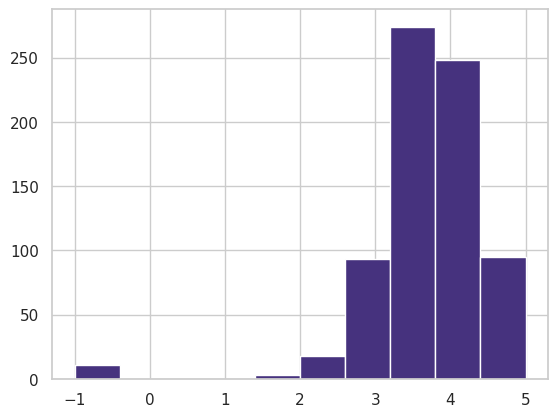

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df.Rating.hist()

<Axes: >

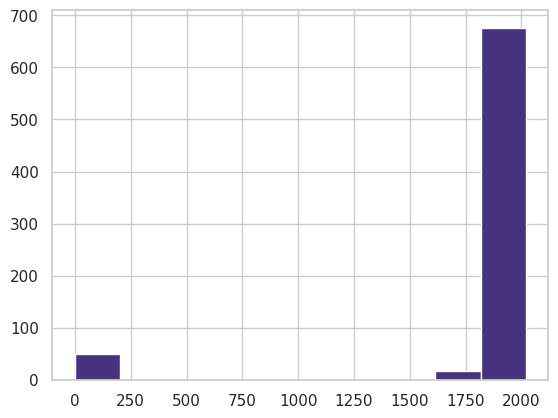

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df.Founded.hist()

<Axes: >

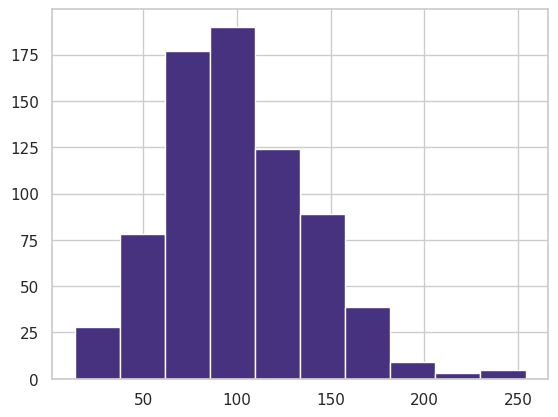

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df['avg_salary'].hist()

<Axes: >

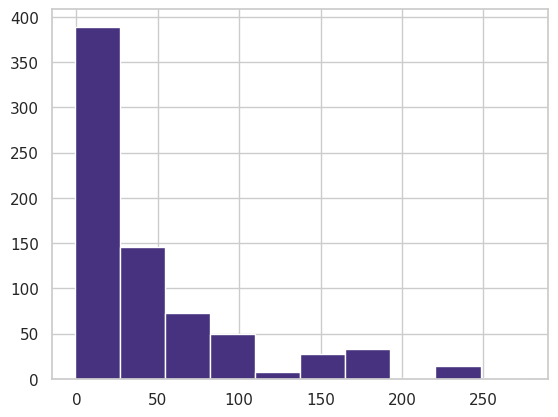

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df.age.hist()

<Axes: >

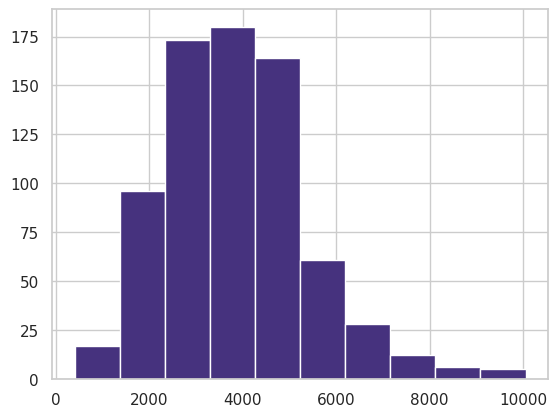

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df.desc_len.hist()

<Axes: >

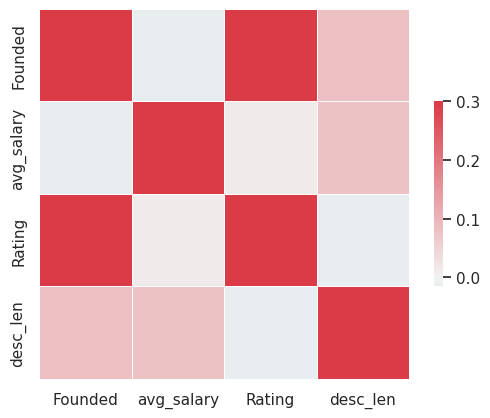

In [ ]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(df[['Founded','avg_salary', 'Rating', 'desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidths=0.5, cbar_kws = {'shrink': .5})

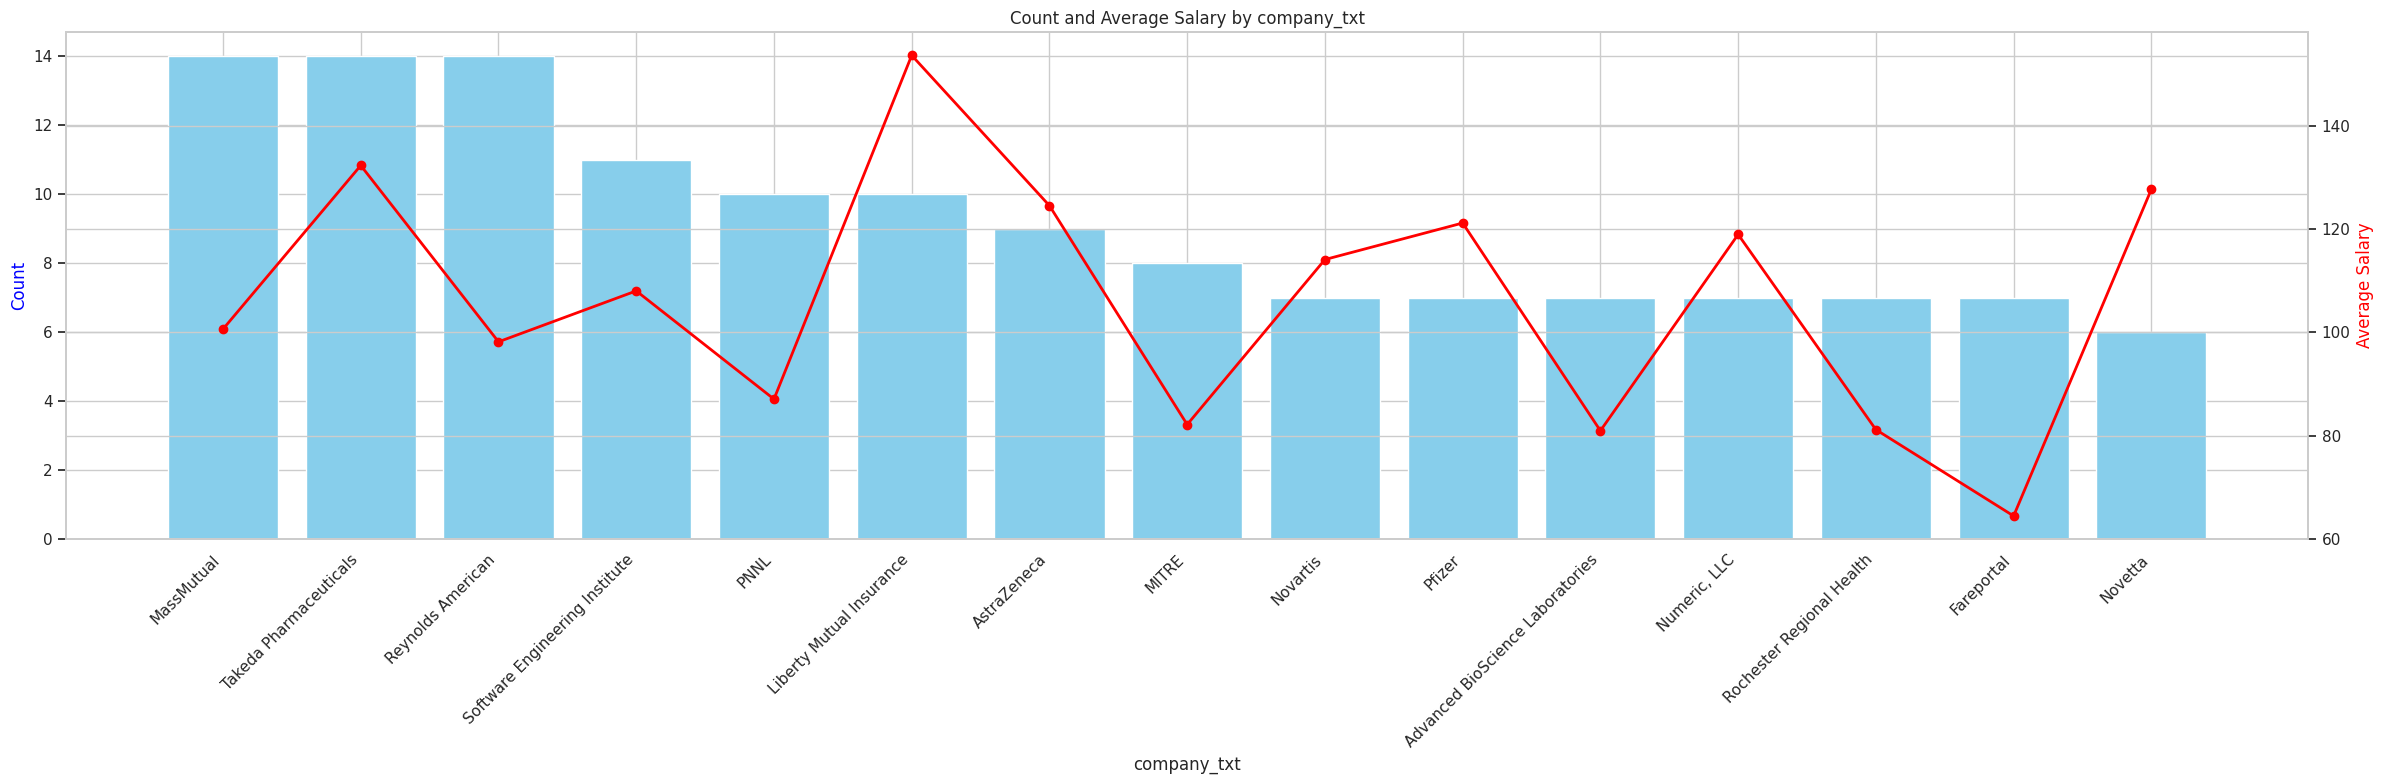

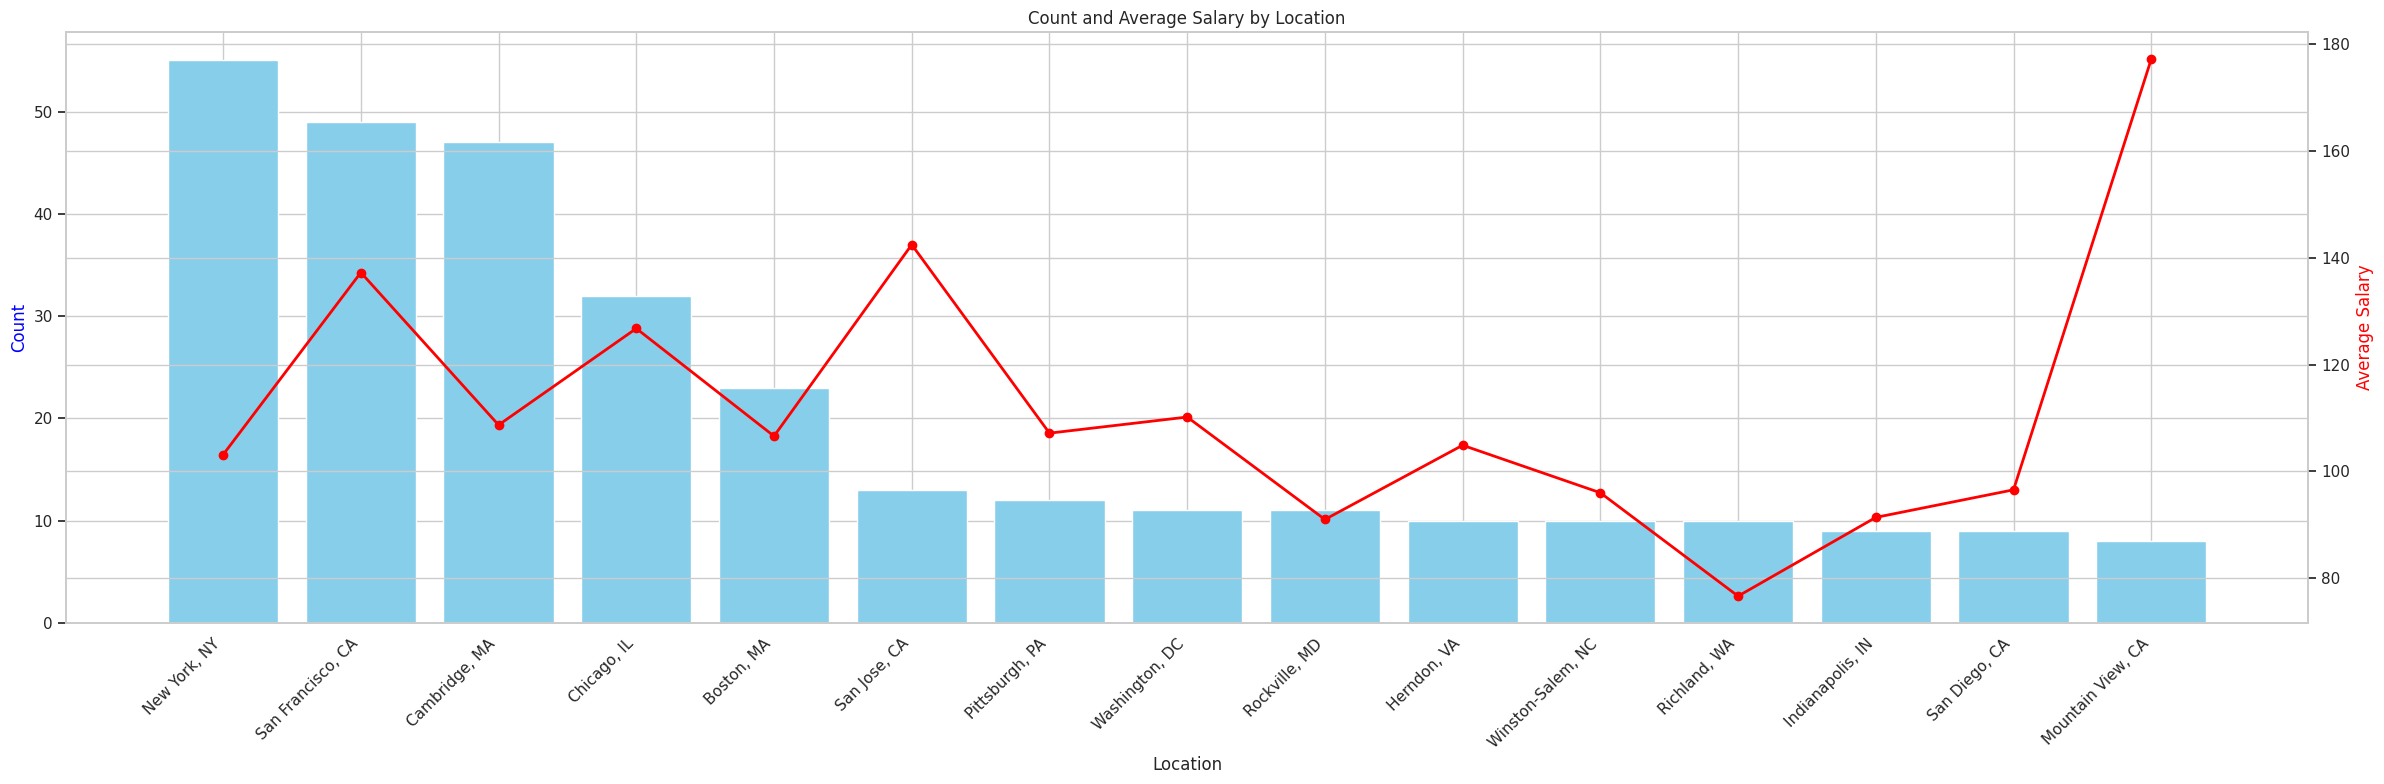

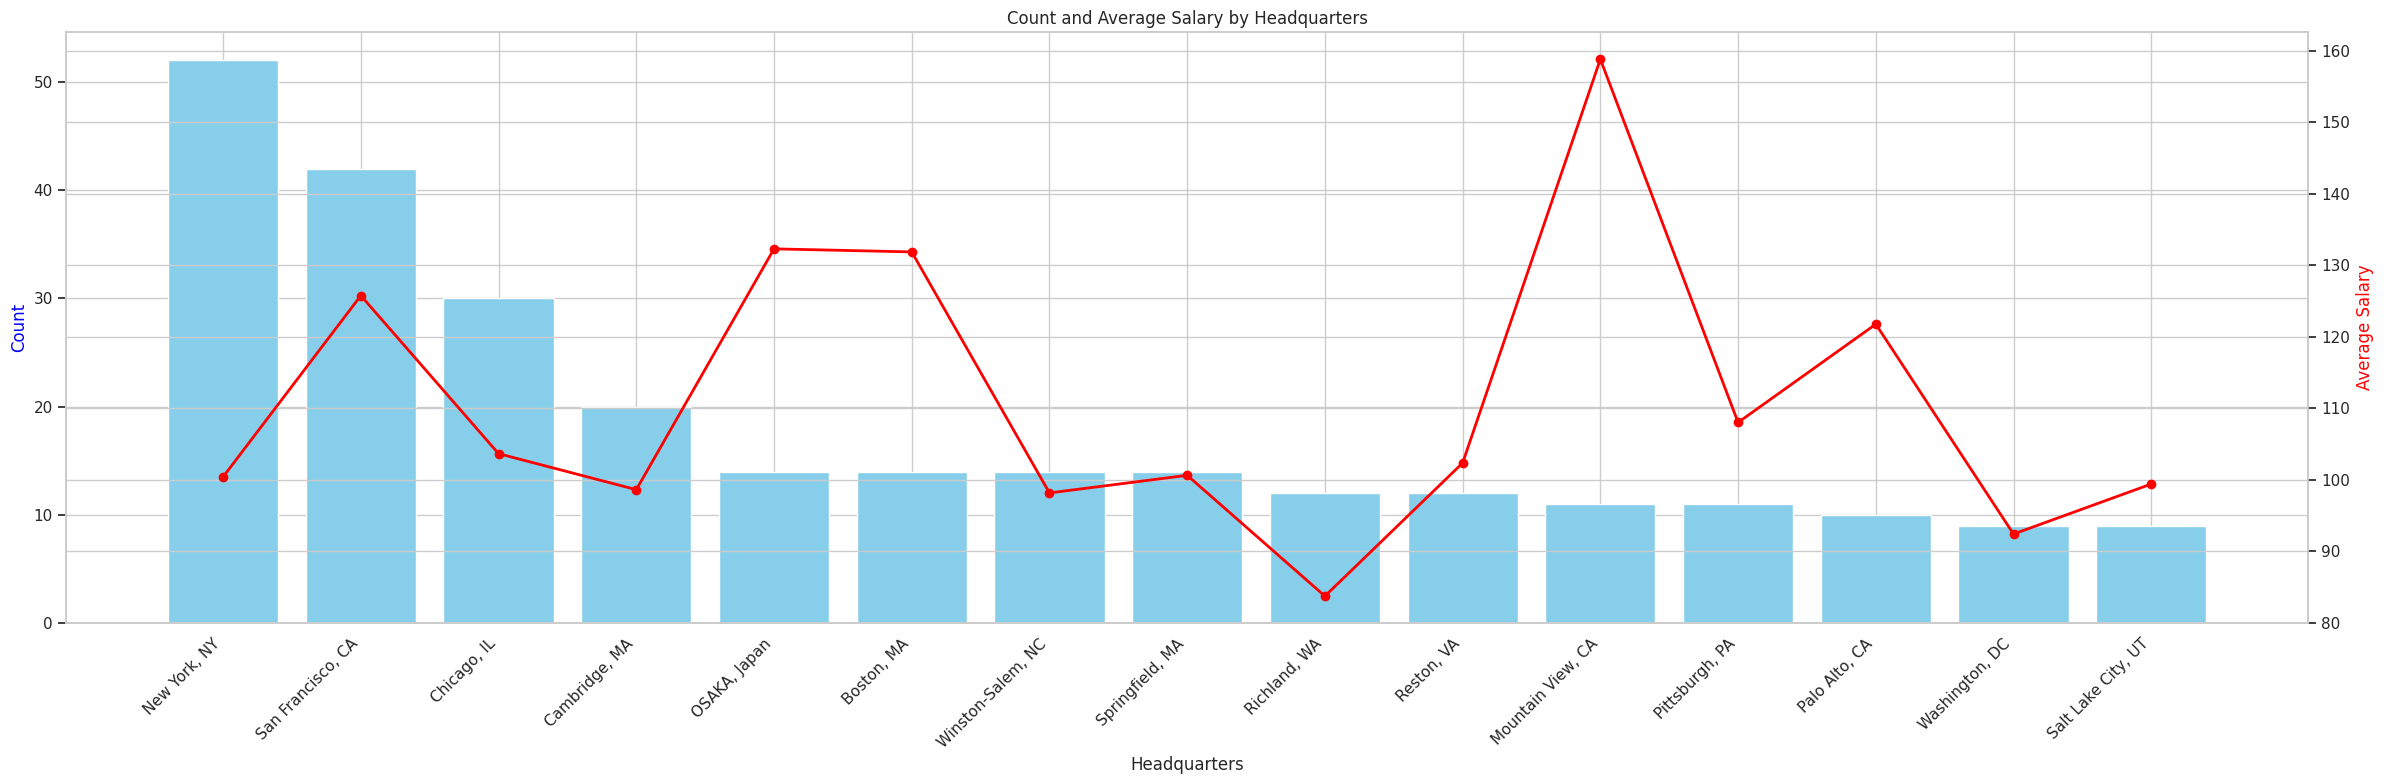

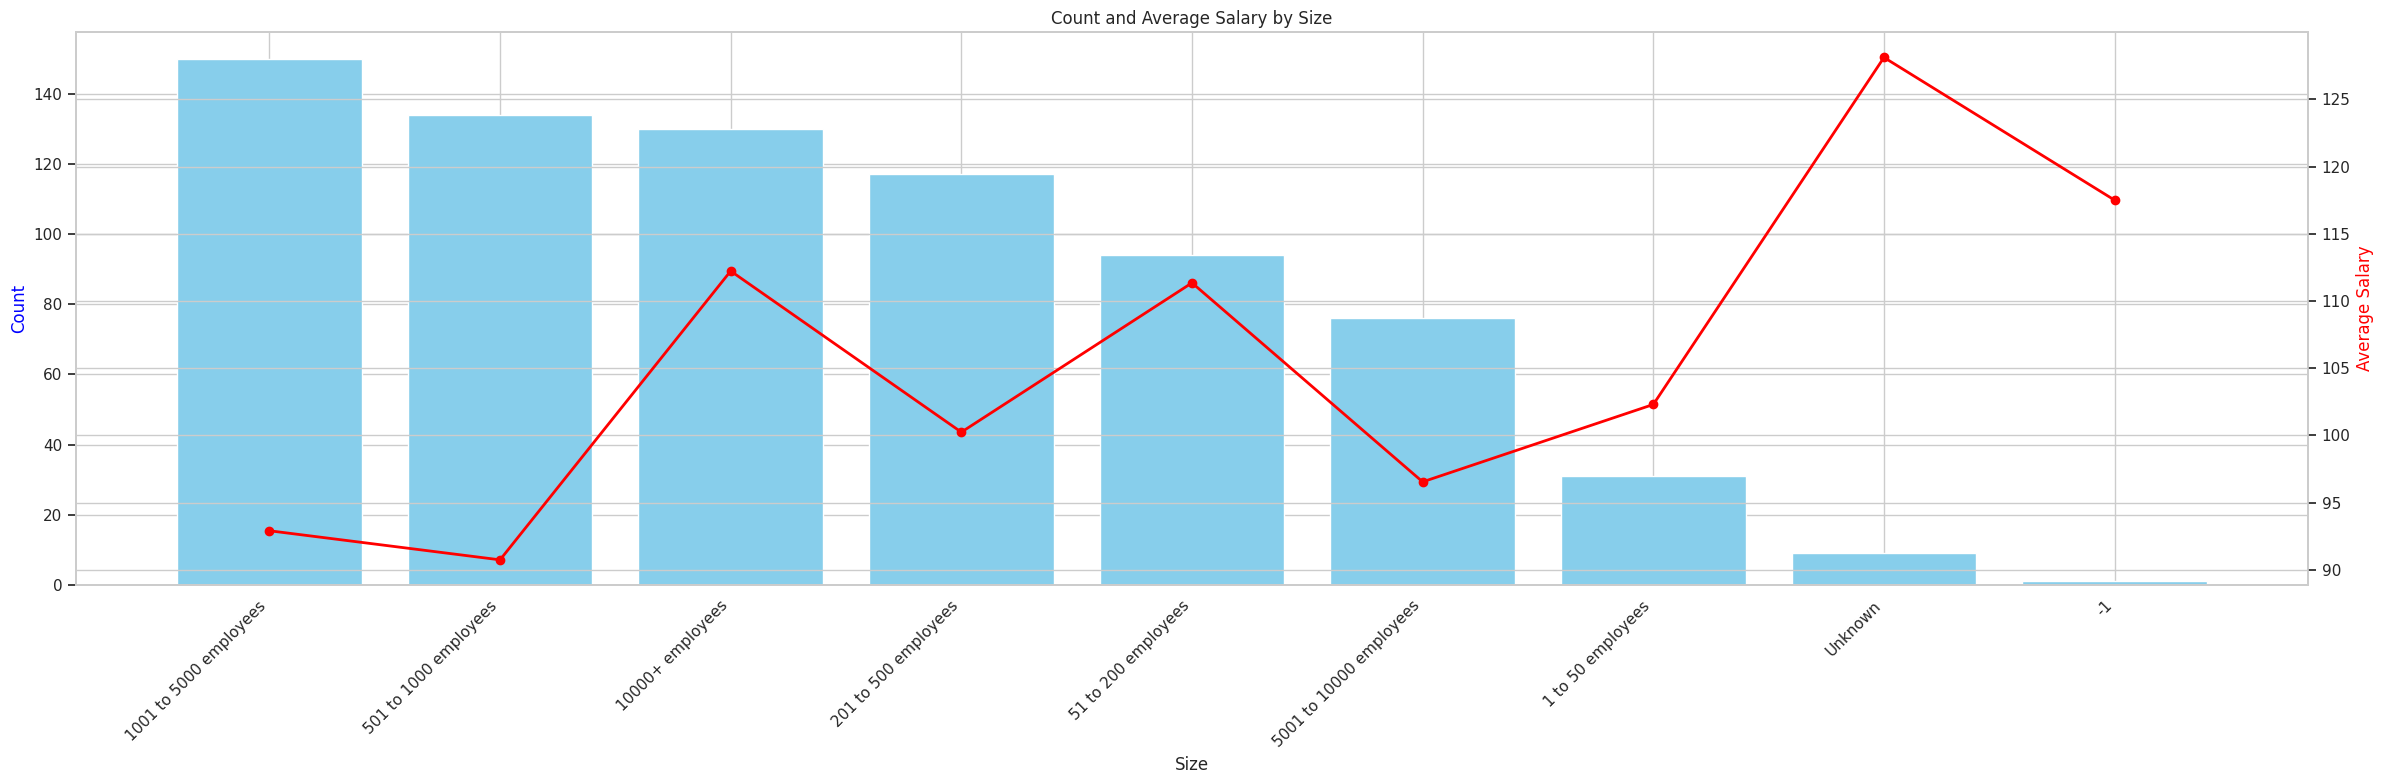

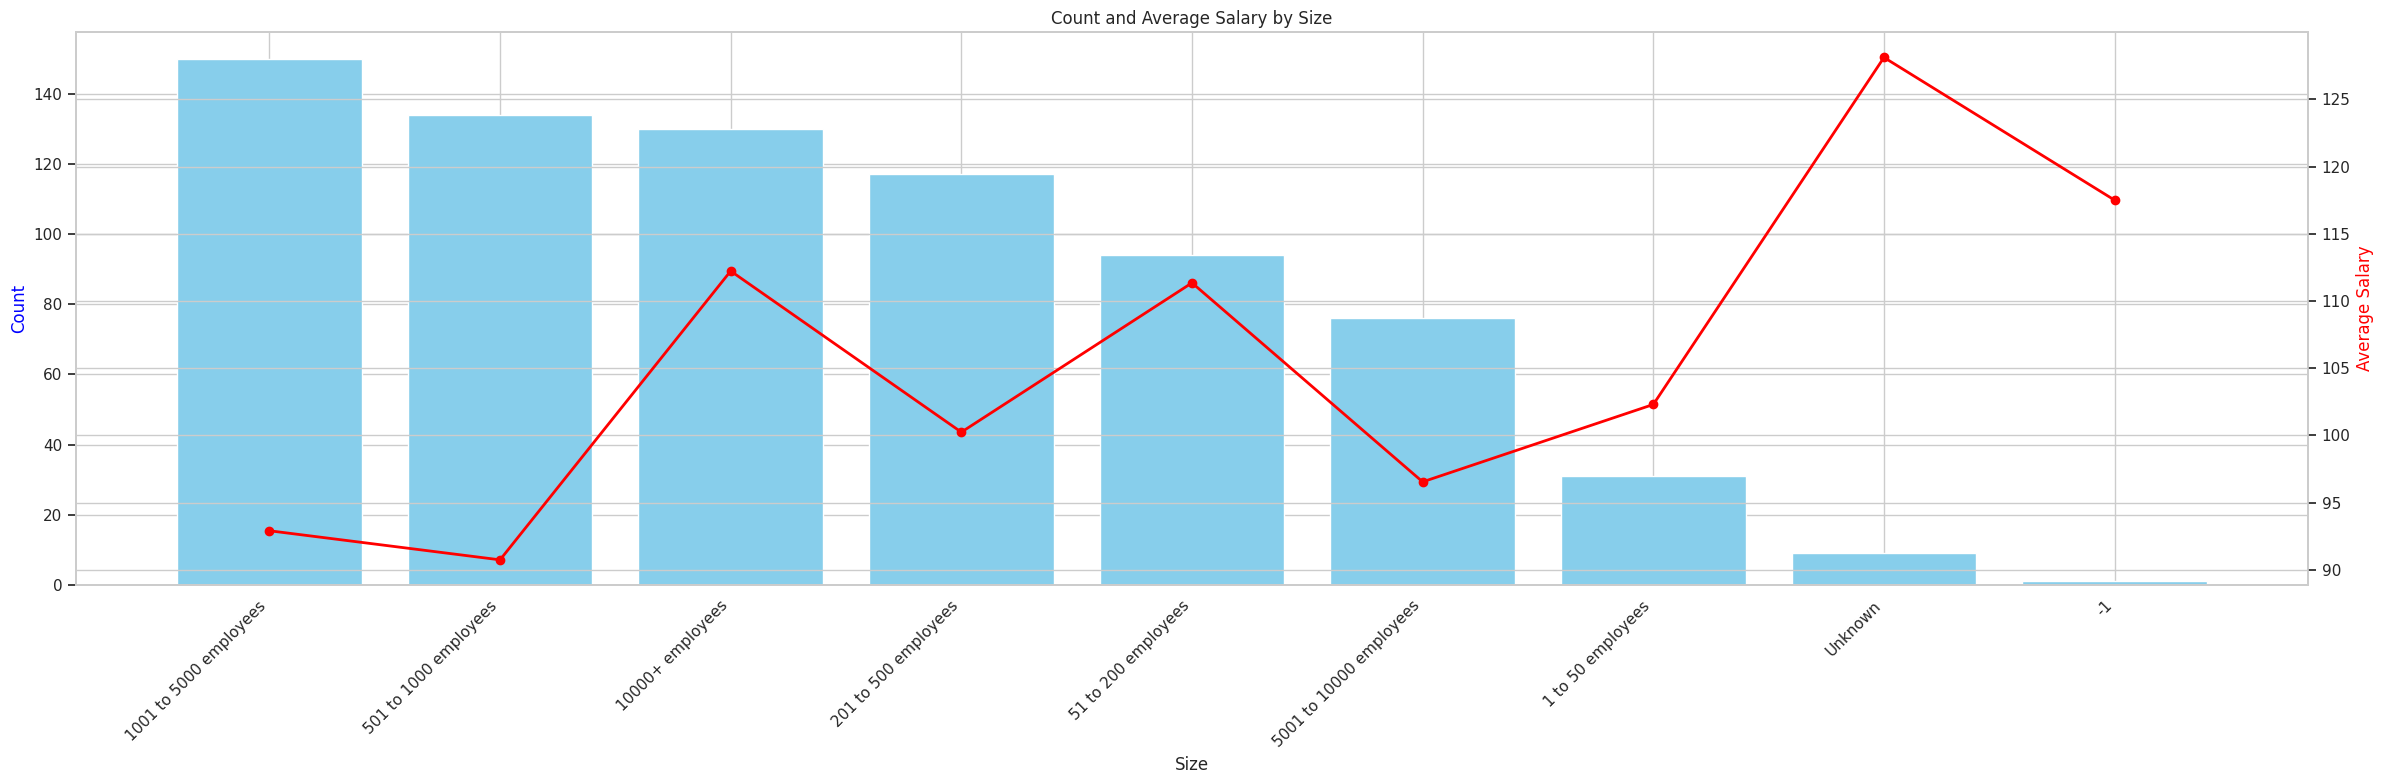

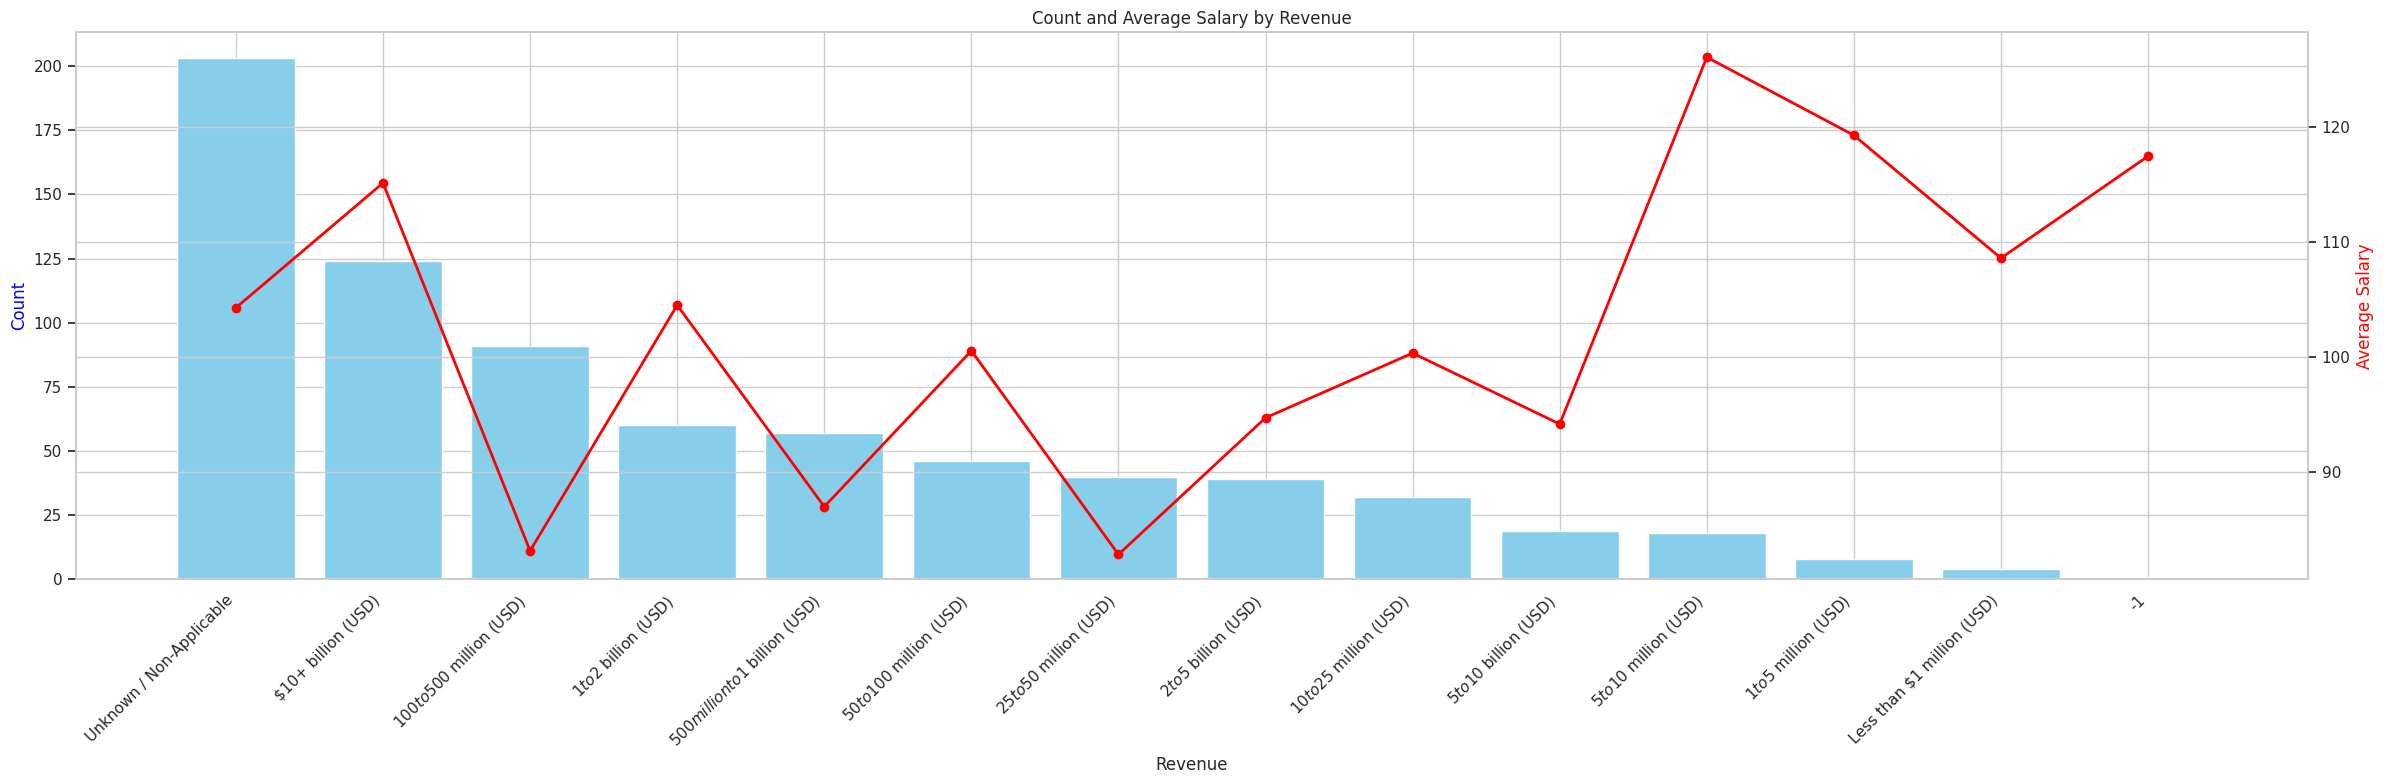

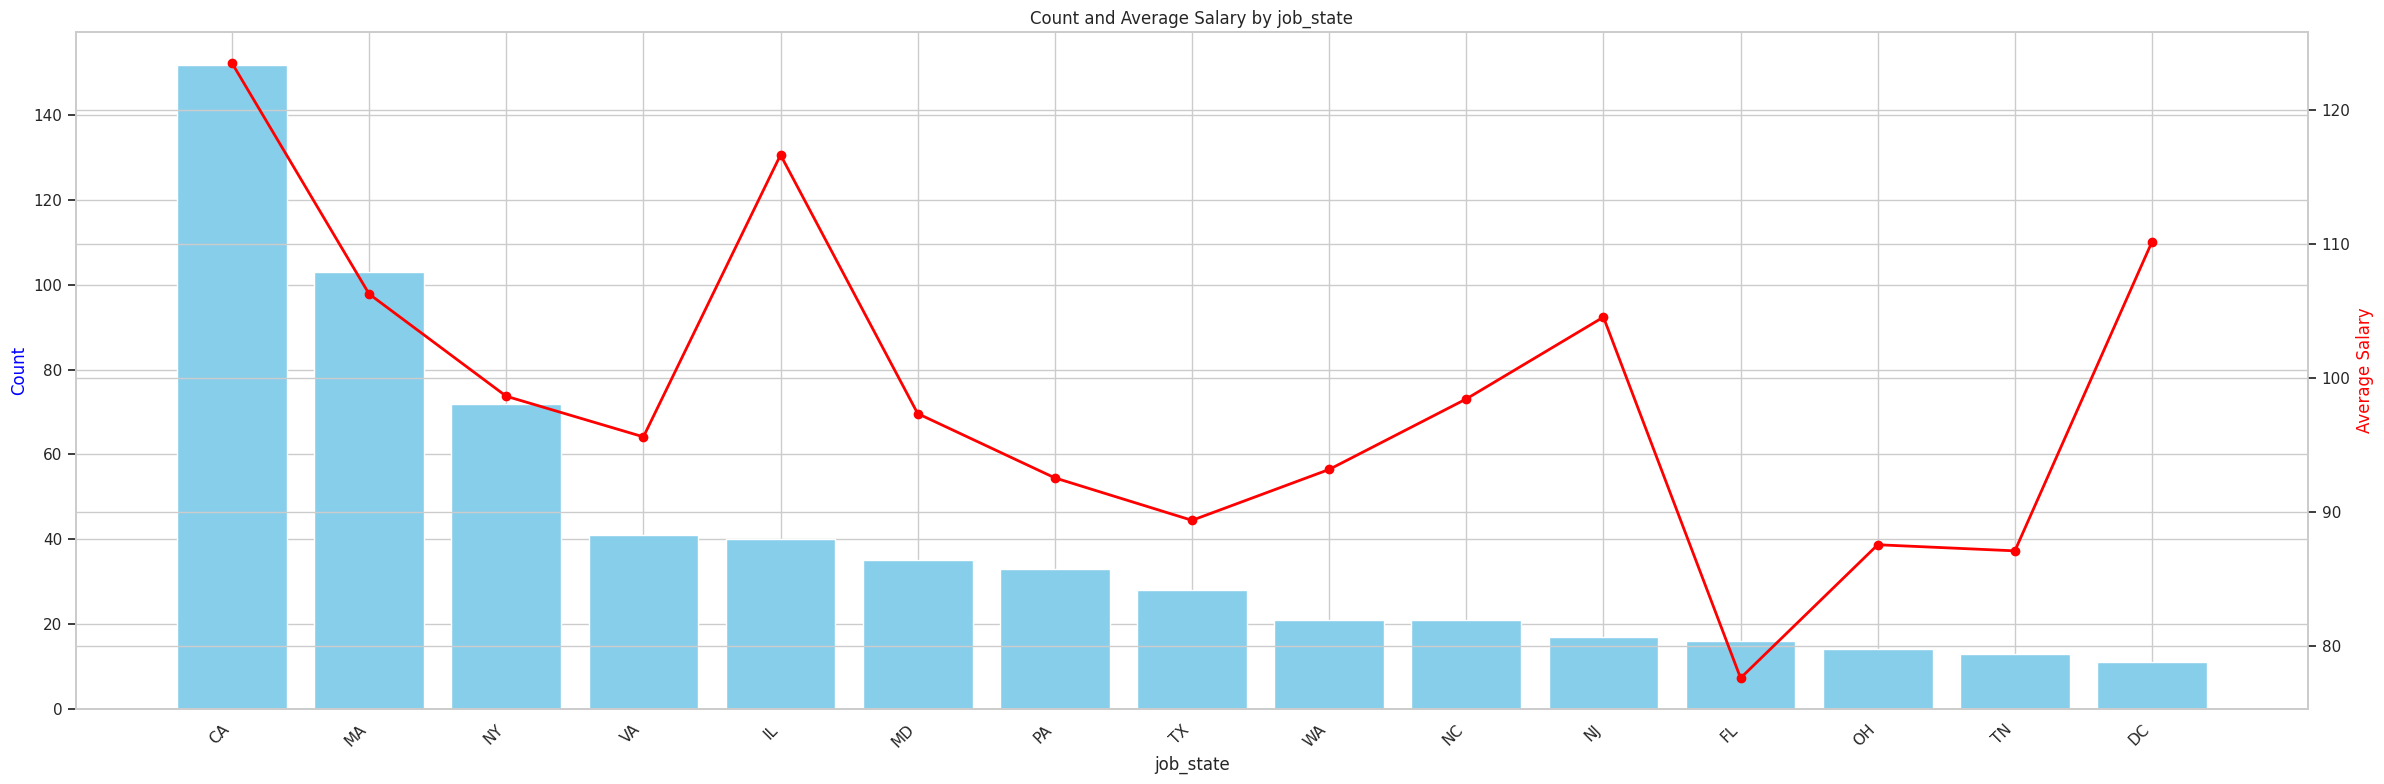

In [ ]:
com_cat_col = [col for col in com_col if (col in cat_col)]

for feature in com_cat_col:
    count_data = df[feature].value_counts().head(15).rename('count')
    avg_salary = df.groupby(feature)['avg_salary'].mean().loc[count_data.index].rename('avg_salary')
    merged = pd.concat([count_data, avg_salary], axis=1).reset_index().rename(columns={'index': feature})

    fig, ax1 = plt.subplots(figsize=(24, 8))
    ax1.bar(merged[feature], merged['count'], color='skyblue')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(merged[feature], merged['avg_salary'], color='red', marker='o', linewidth=2)
    ax2.set_ylabel('Average Salary', color='red')

    plt.title(f"Count and Average Salary by {feature}")

    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

## experience domain

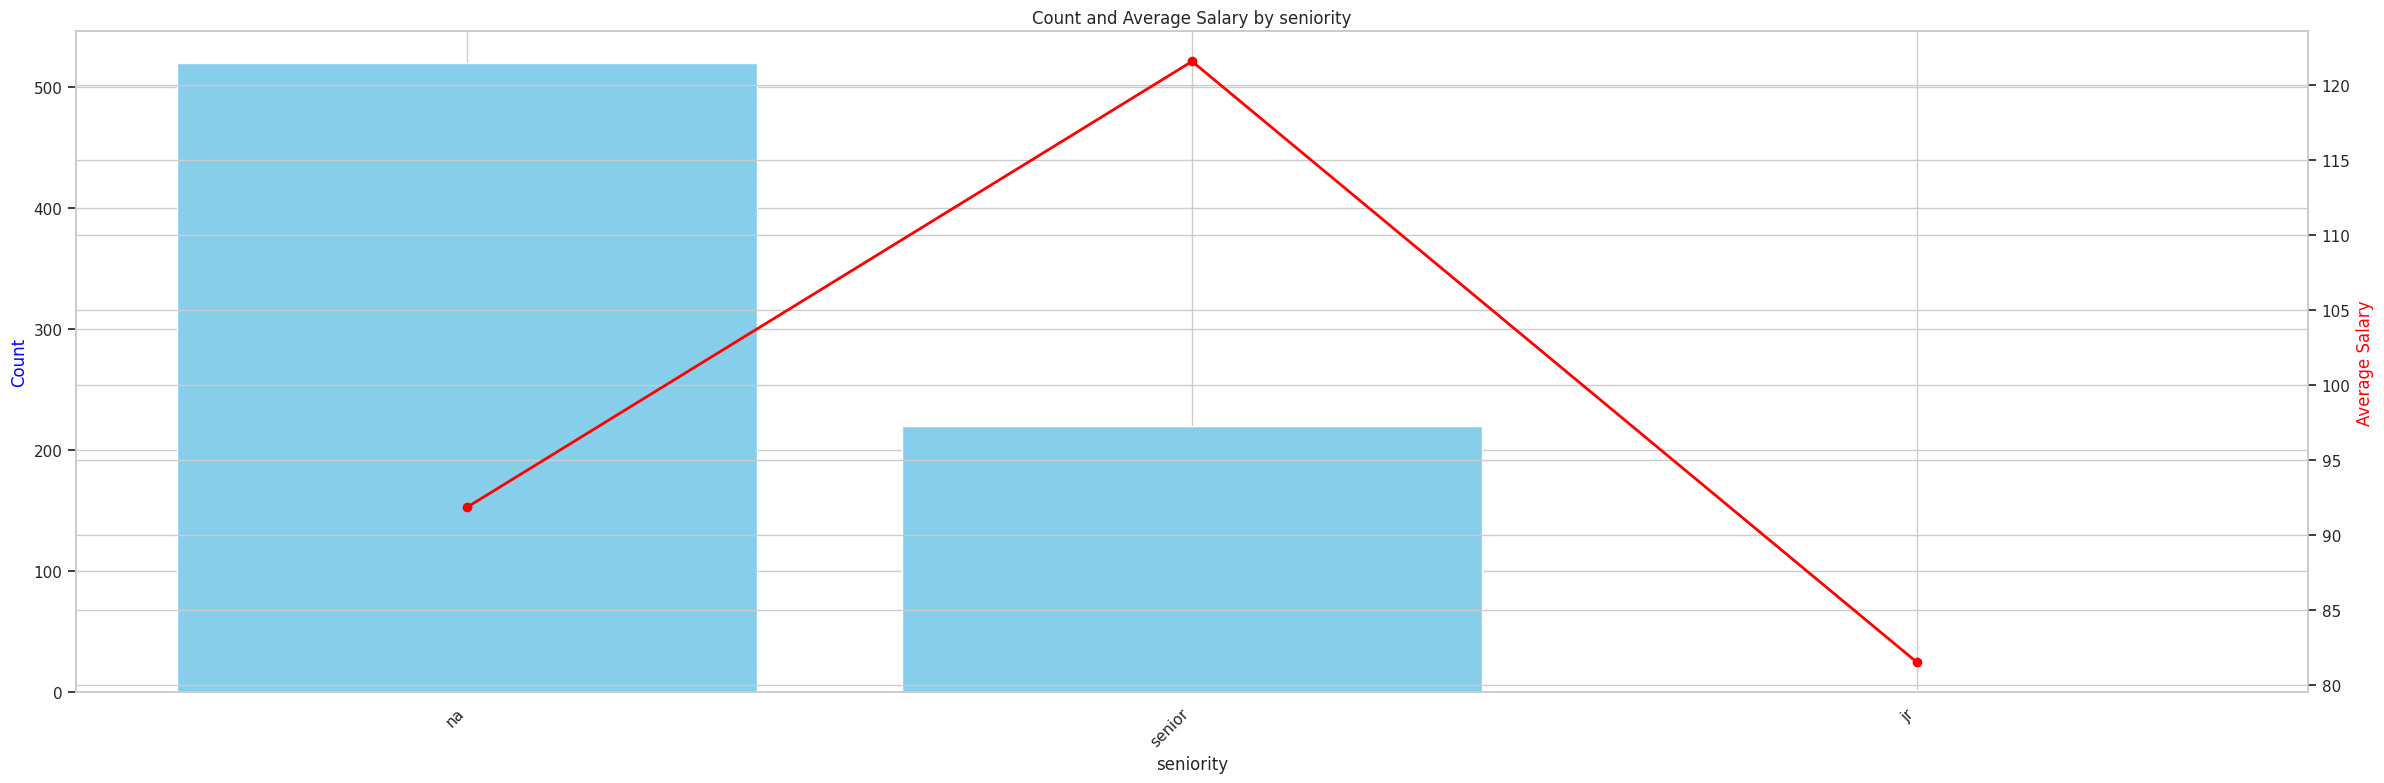

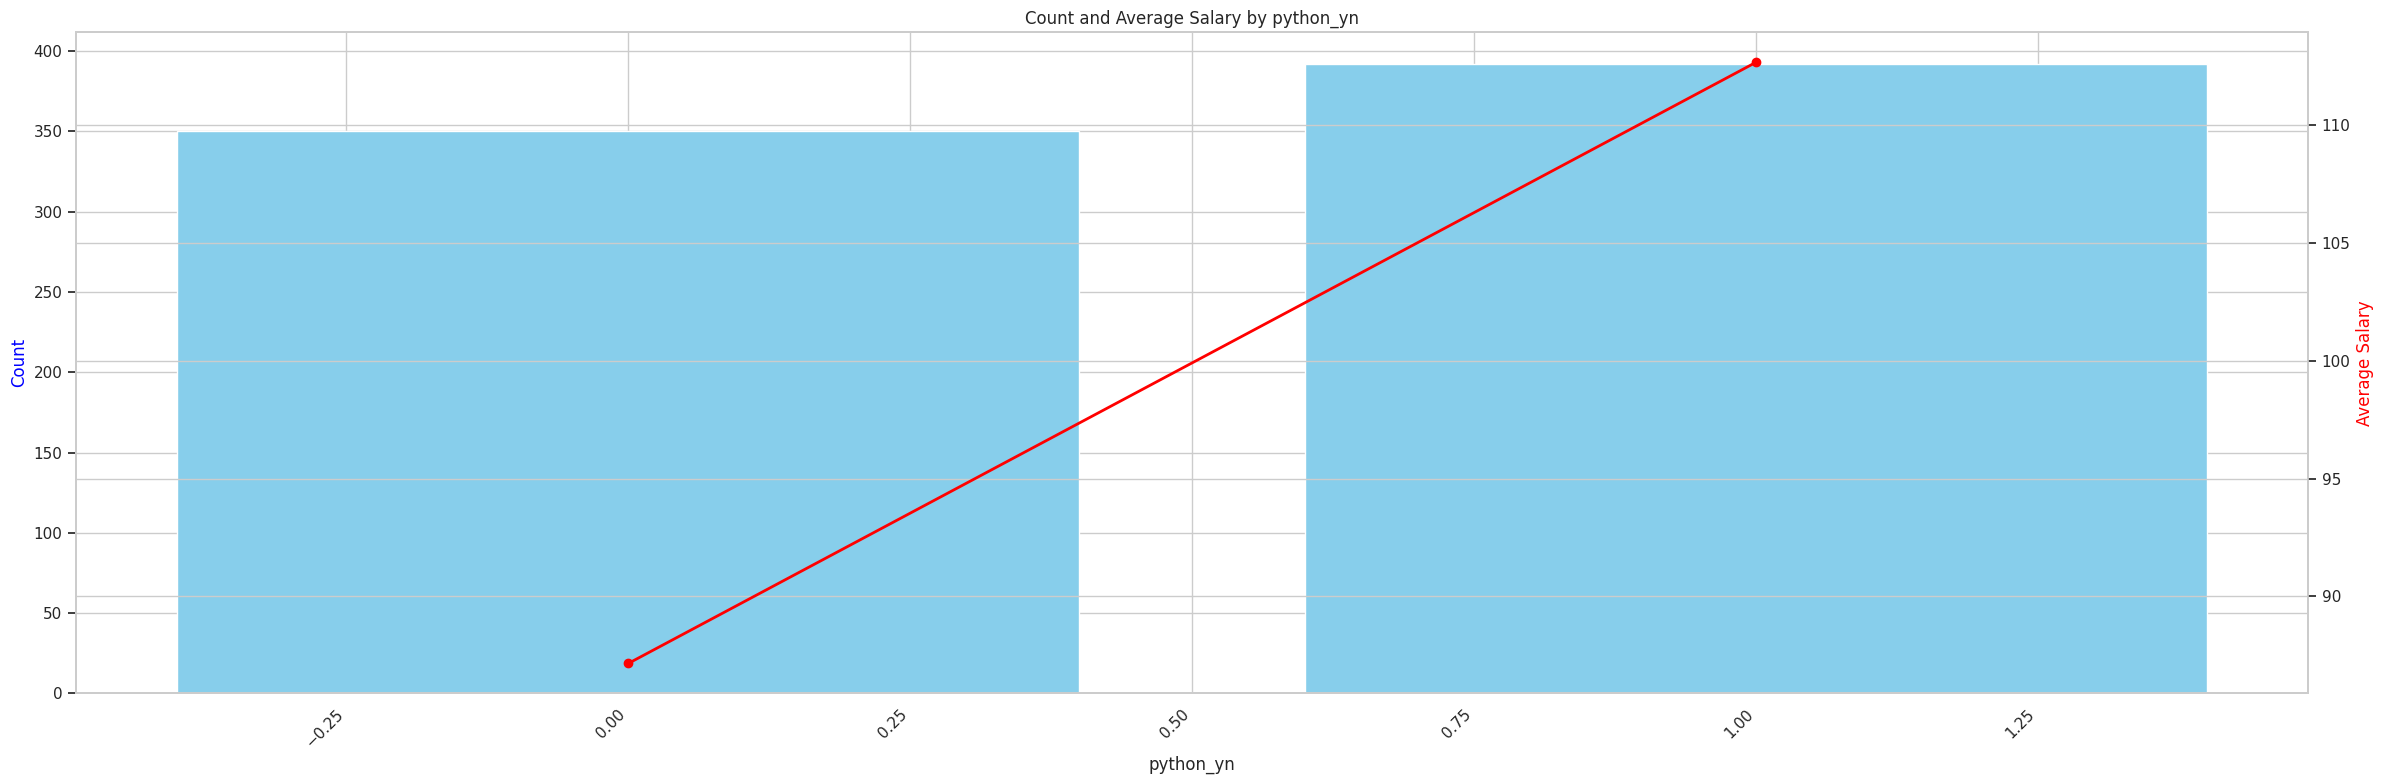

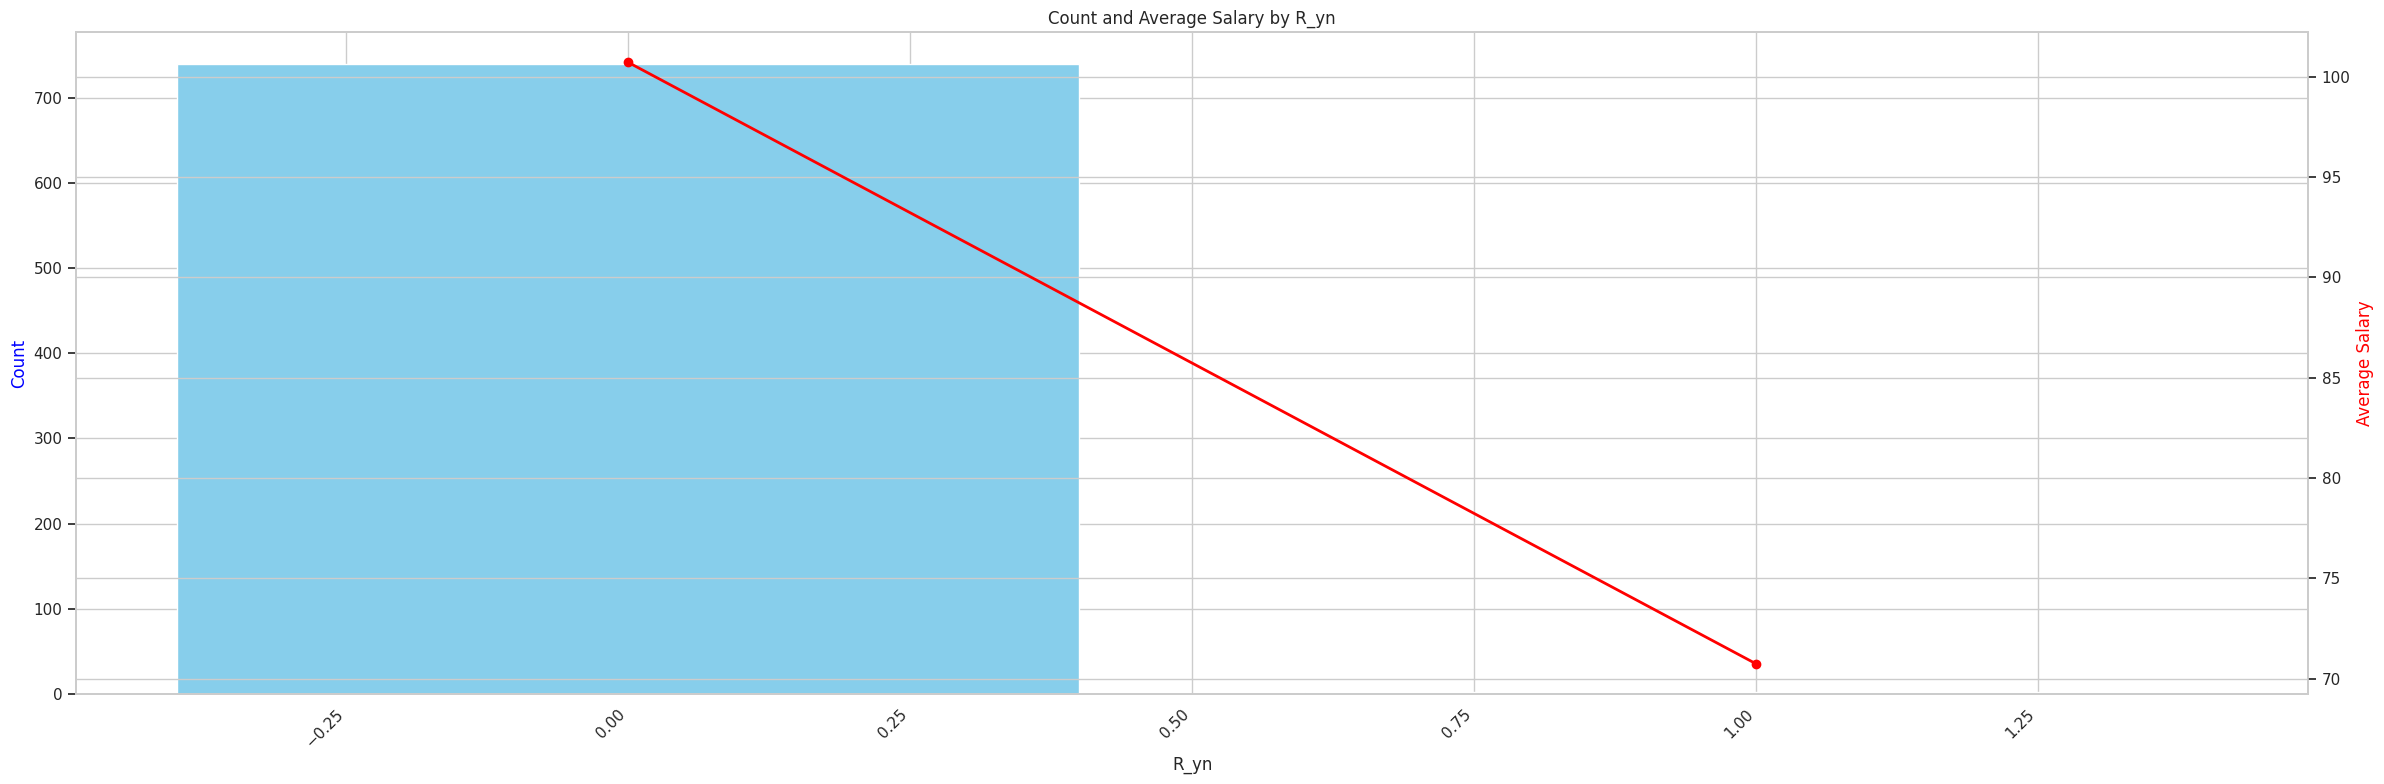

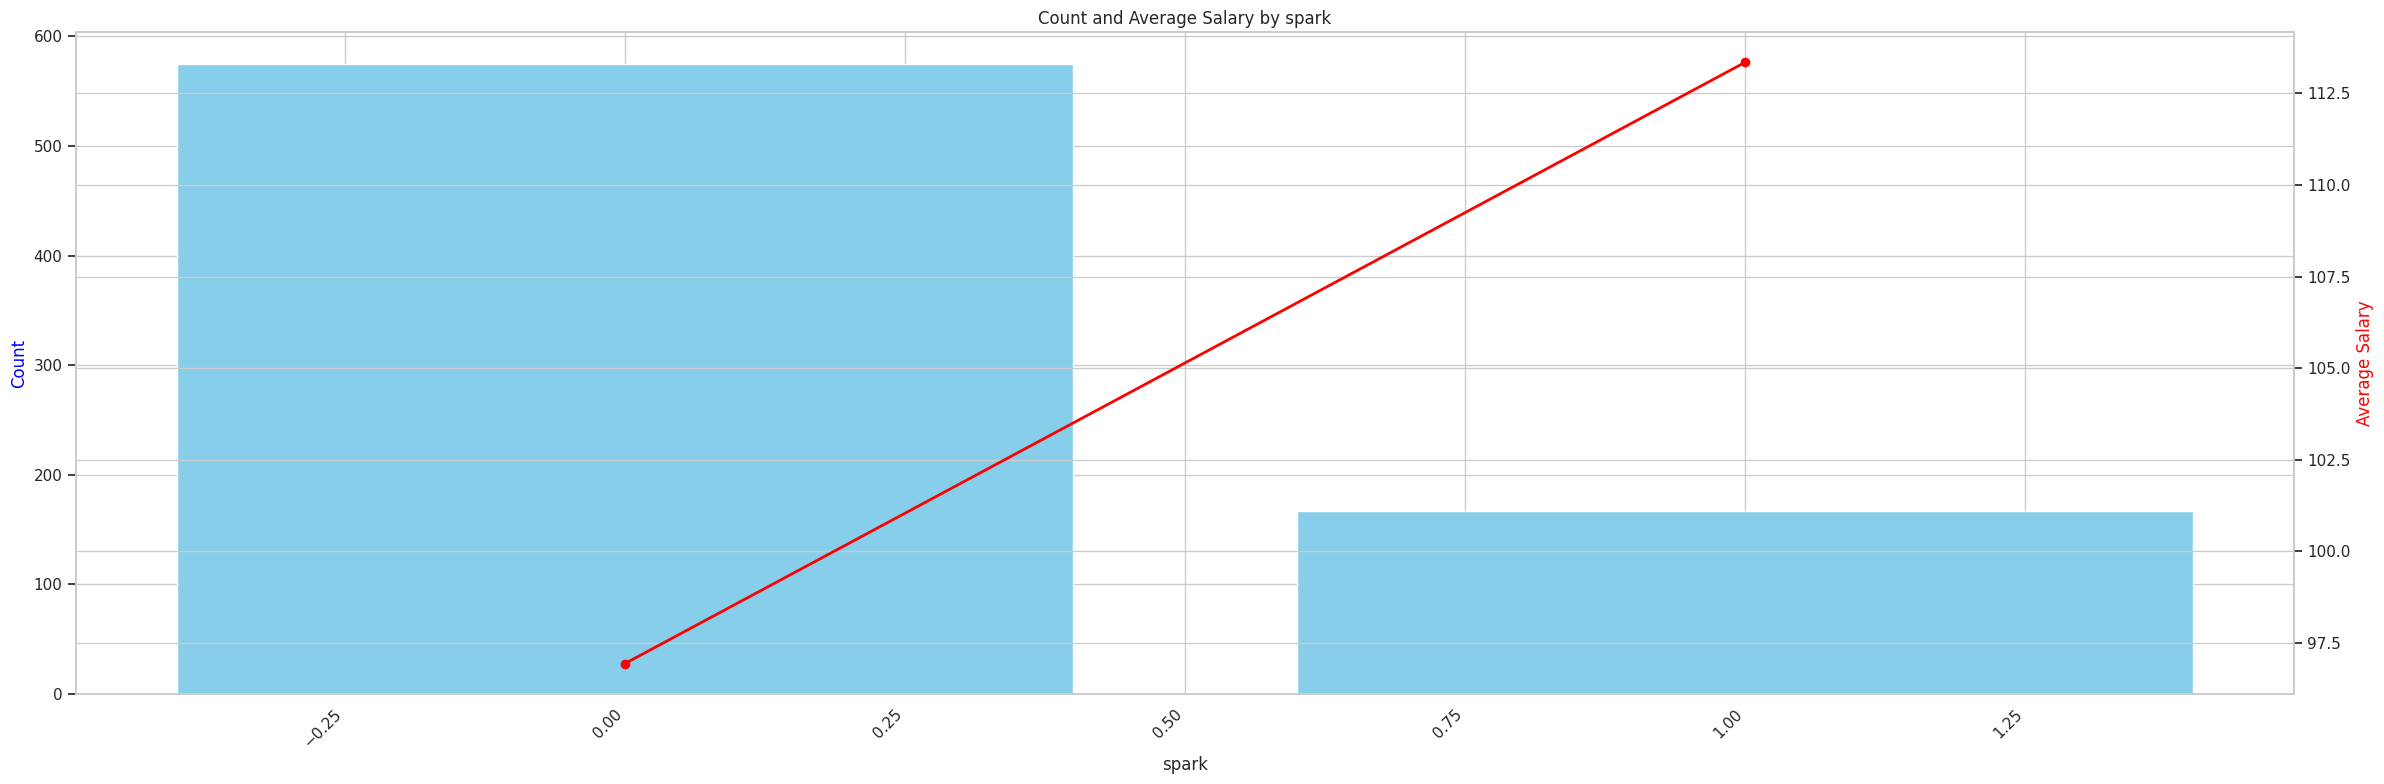

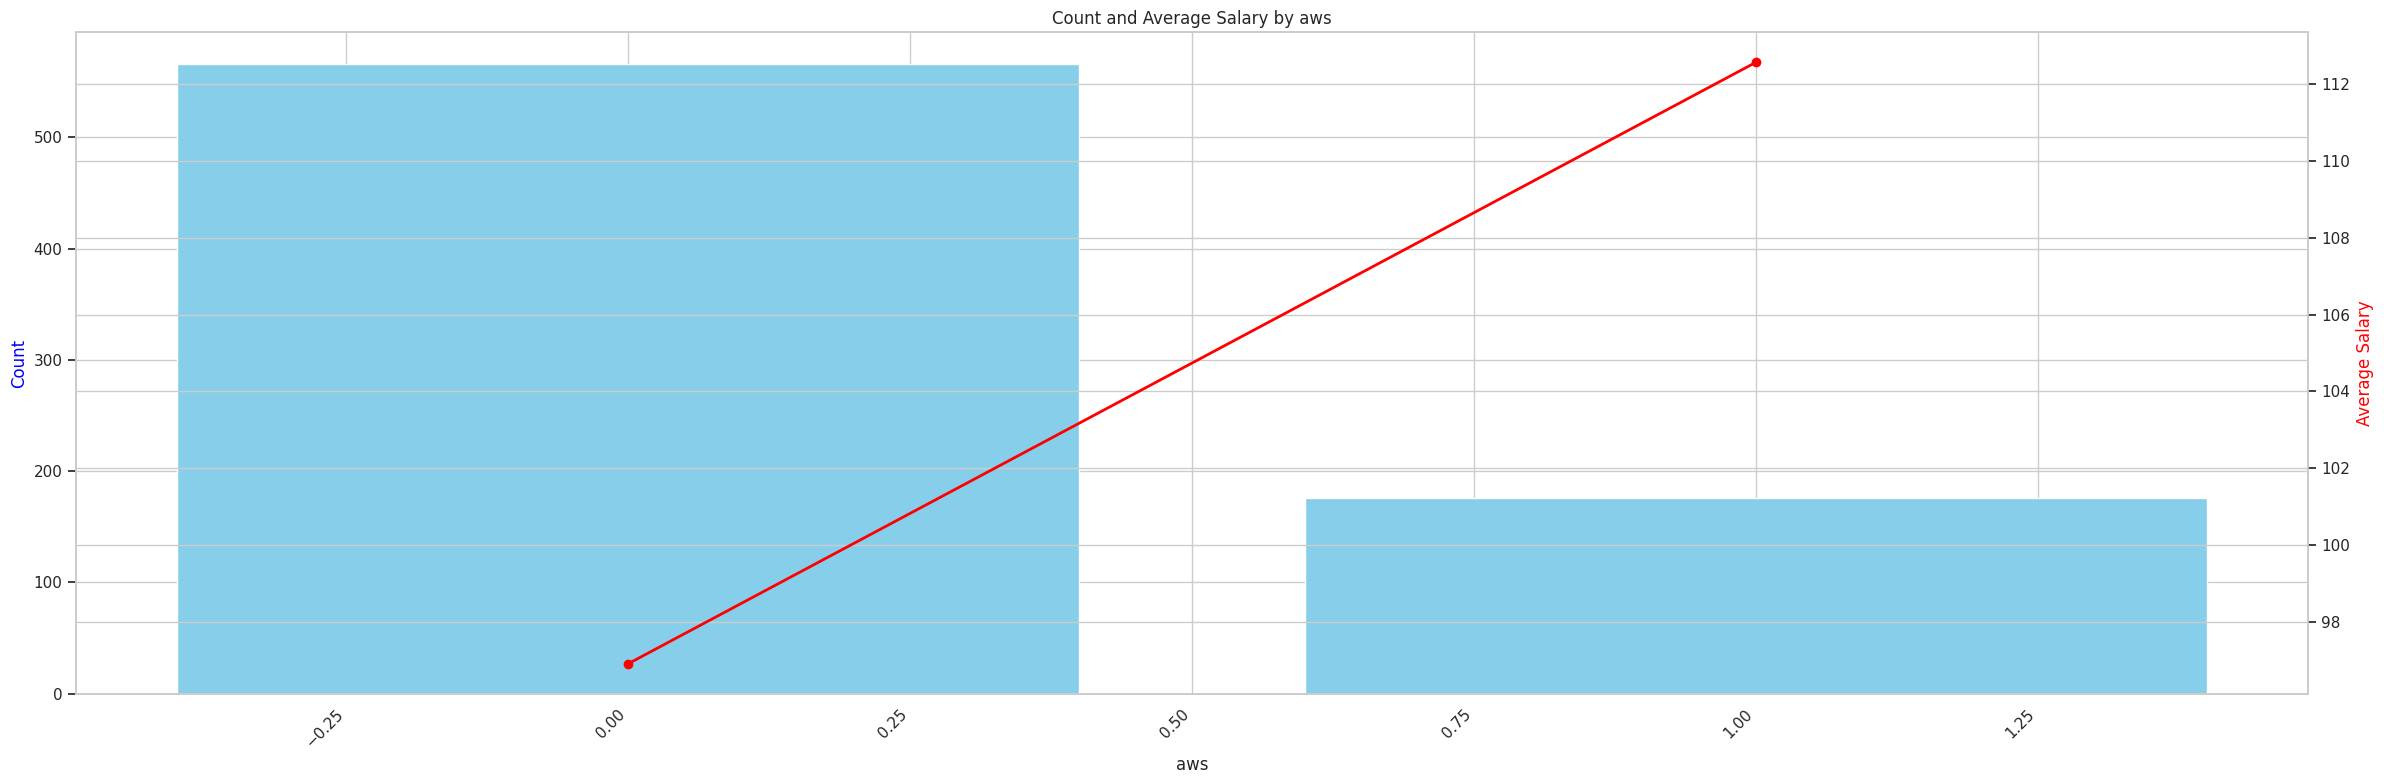

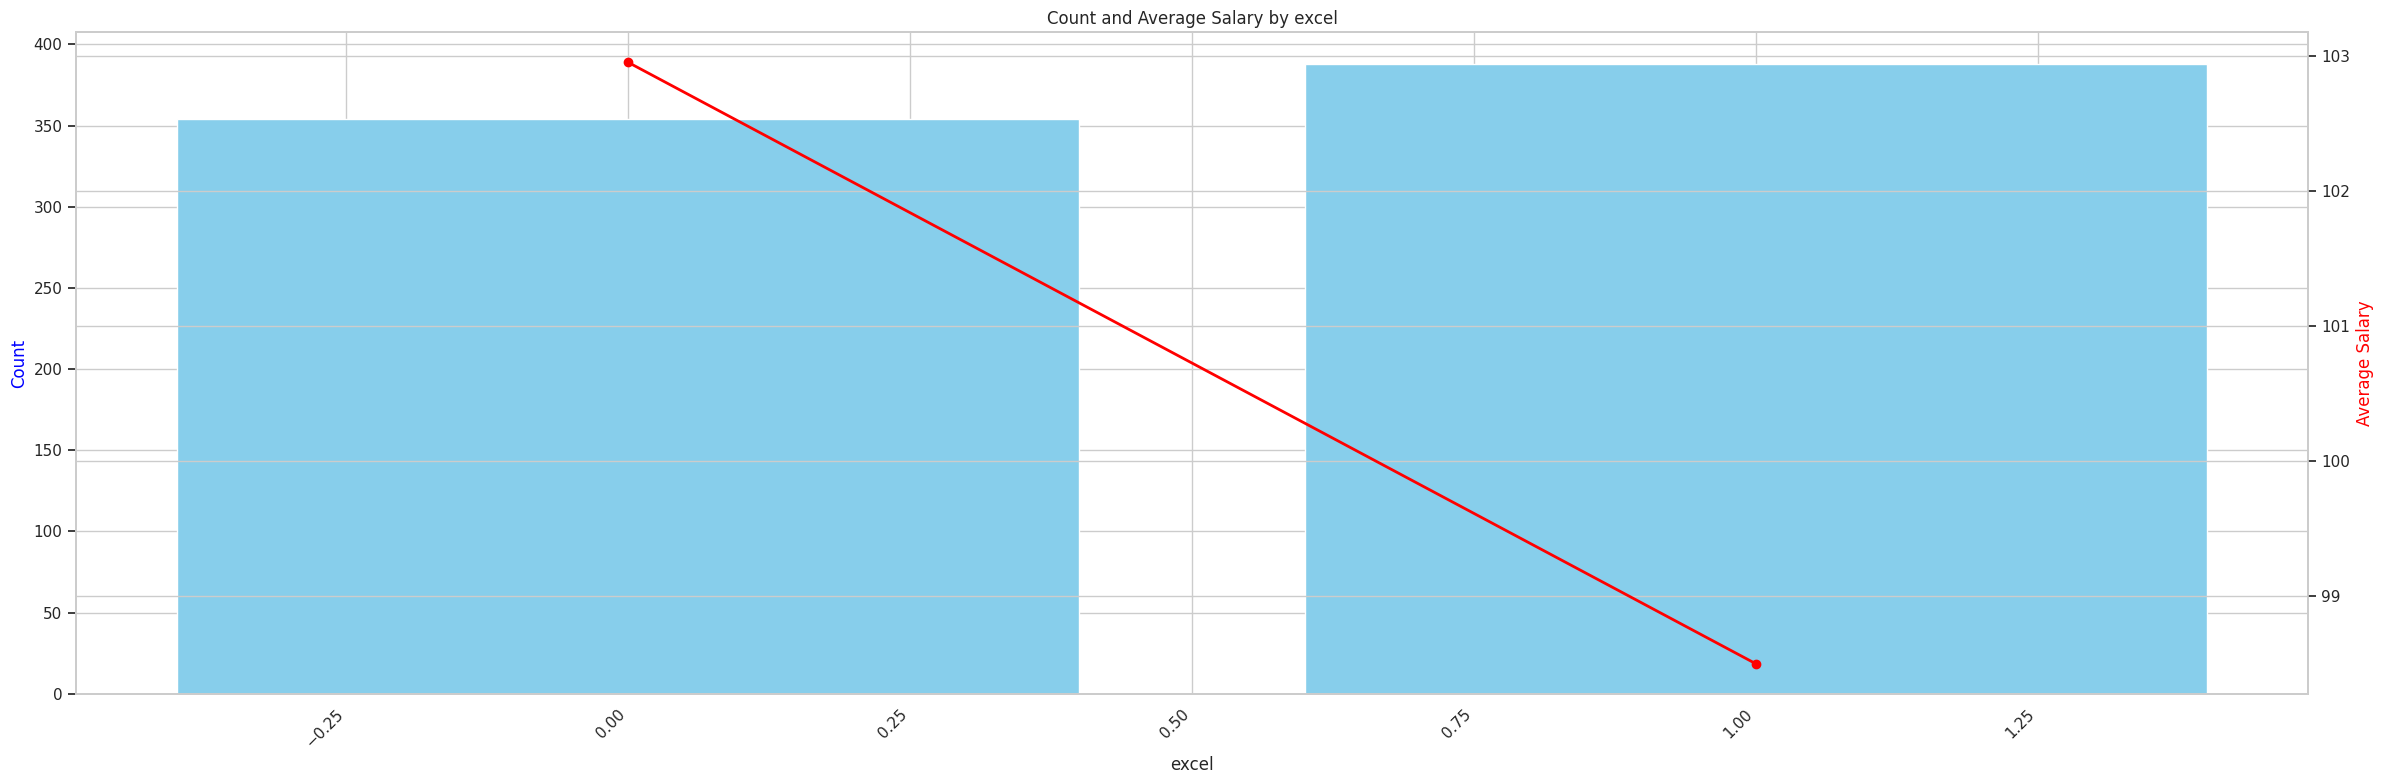

In [ ]:
exp_cat_col = [col for col in exp_col if (col in exp_col)]

for feature in exp_cat_col:
    count_data = df[feature].value_counts().head(15).rename('count')
    avg_salary = df.groupby(feature)['avg_salary'].mean().loc[count_data.index].rename('avg_salary')
    merged = pd.concat([count_data, avg_salary], axis=1).reset_index().rename(columns={'index': feature})

    fig, ax1 = plt.subplots(figsize=(24, 8))
    ax1.bar(merged[feature], merged['count'], color='skyblue')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(merged[feature], merged['avg_salary'], color='red', marker='o', linewidth=2)
    ax2.set_ylabel('Average Salary', color='red')

    plt.title(f"Count and Average Salary by {feature}")

    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

## industry domain

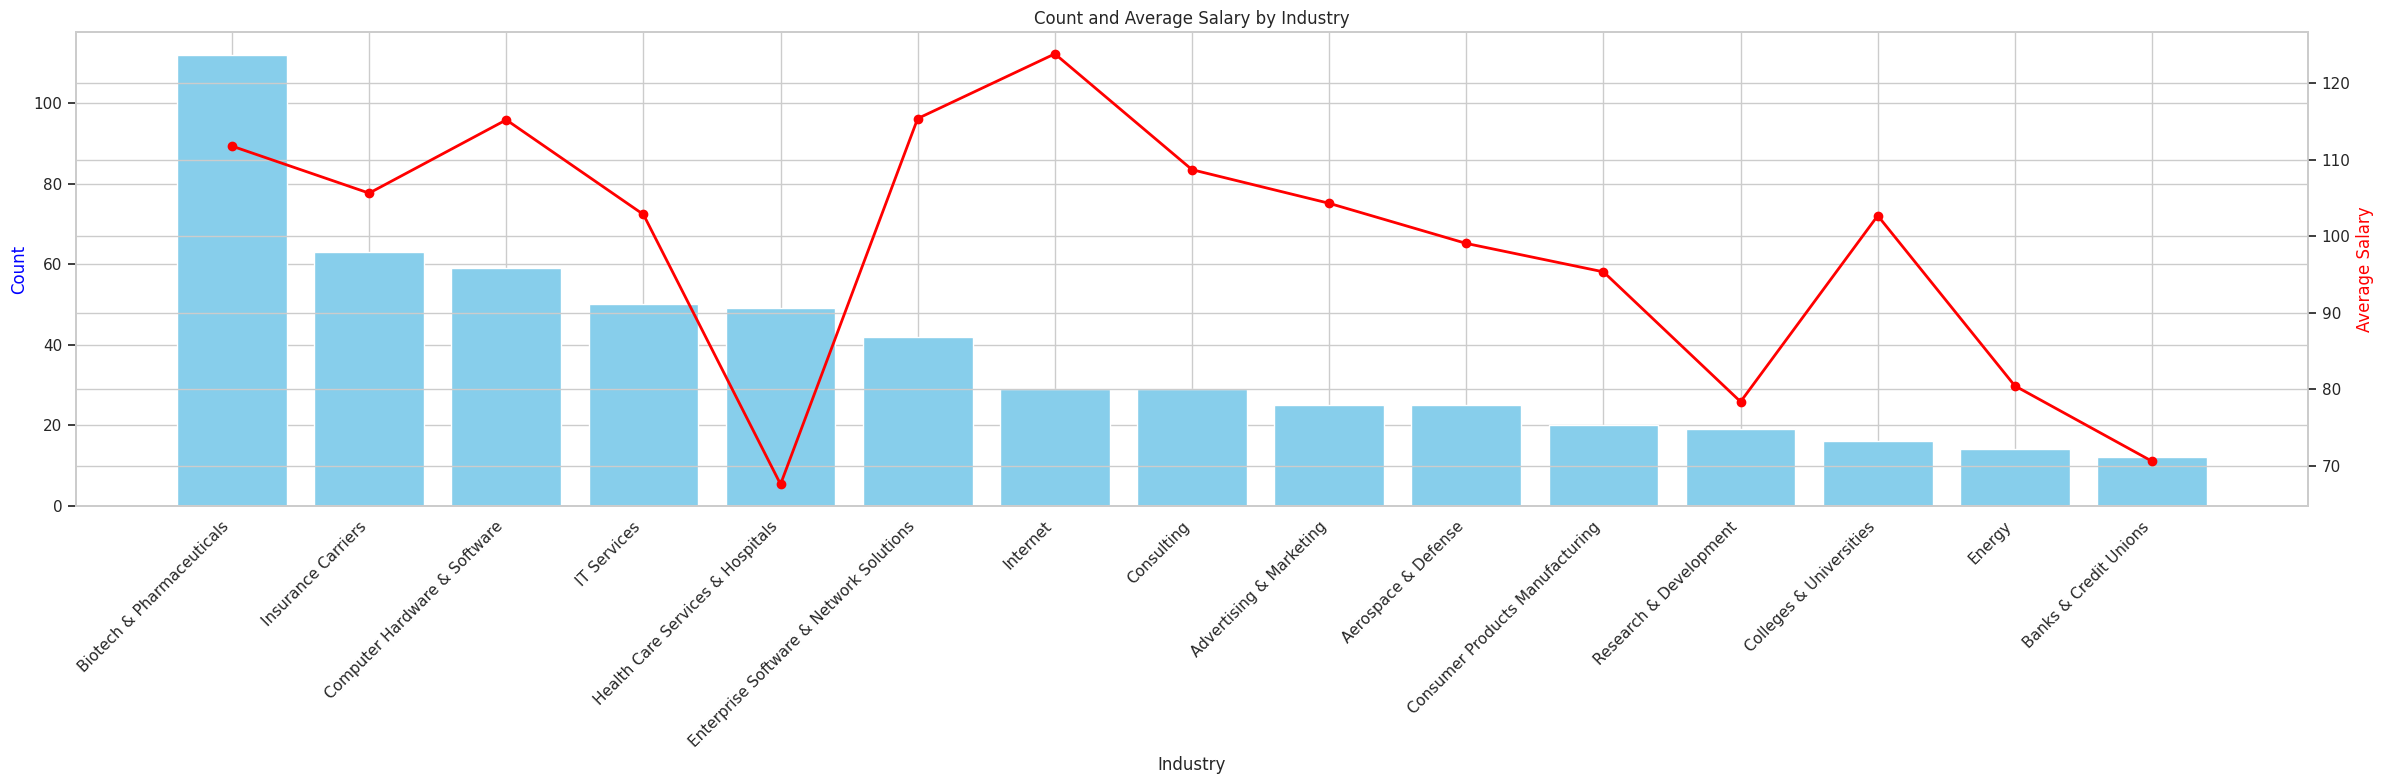

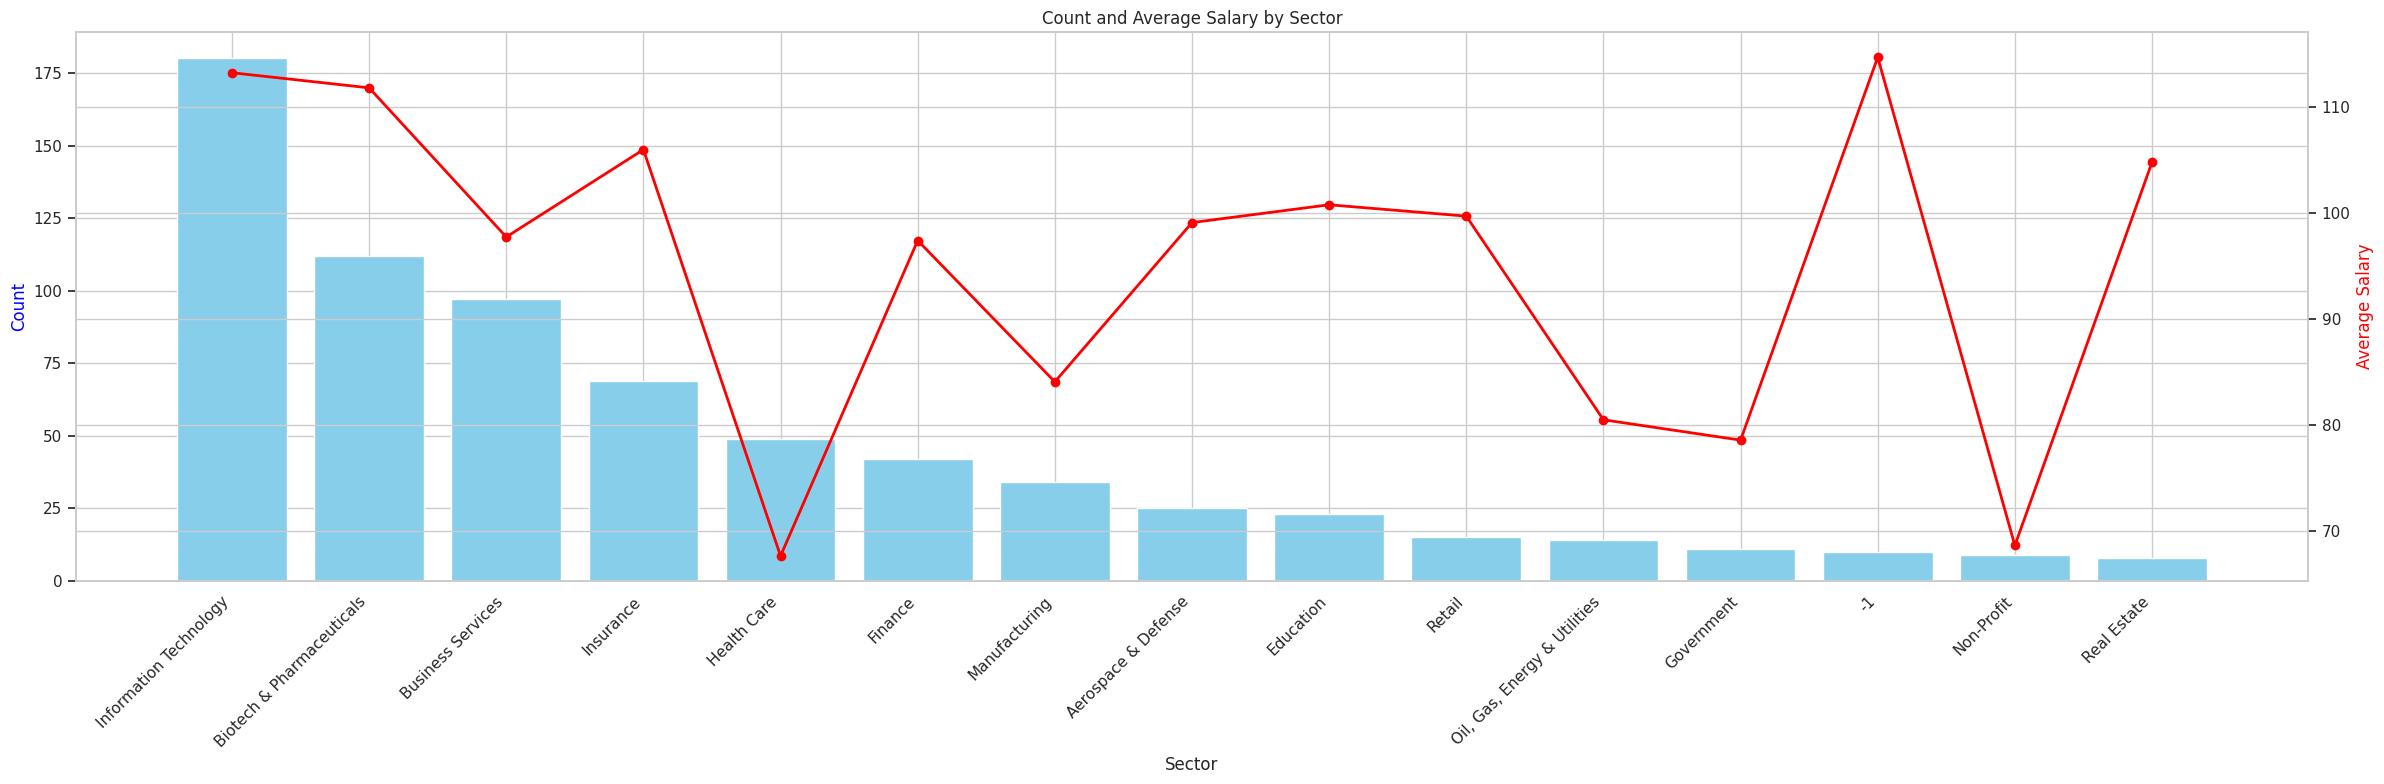

In [ ]:
ind_cat_col = [col for col in ind_col if (col in ind_col)]

for feature in ind_cat_col:
    count_data = df[feature].value_counts().head(15).rename('count')
    avg_salary = df.groupby(feature)['avg_salary'].mean().loc[count_data.index].rename('avg_salary')
    merged = pd.concat([count_data, avg_salary], axis=1).reset_index().rename(columns={'index': feature})

    fig, ax1 = plt.subplots(figsize=(24, 8))
    ax1.bar(merged[feature], merged['count'], color='skyblue')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(merged[feature], merged['avg_salary'], color='red', marker='o', linewidth=2)
    ax2.set_ylabel('Average Salary', color='red')

    plt.title(f"Count and Average Salary by {feature}")

    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

## job domain

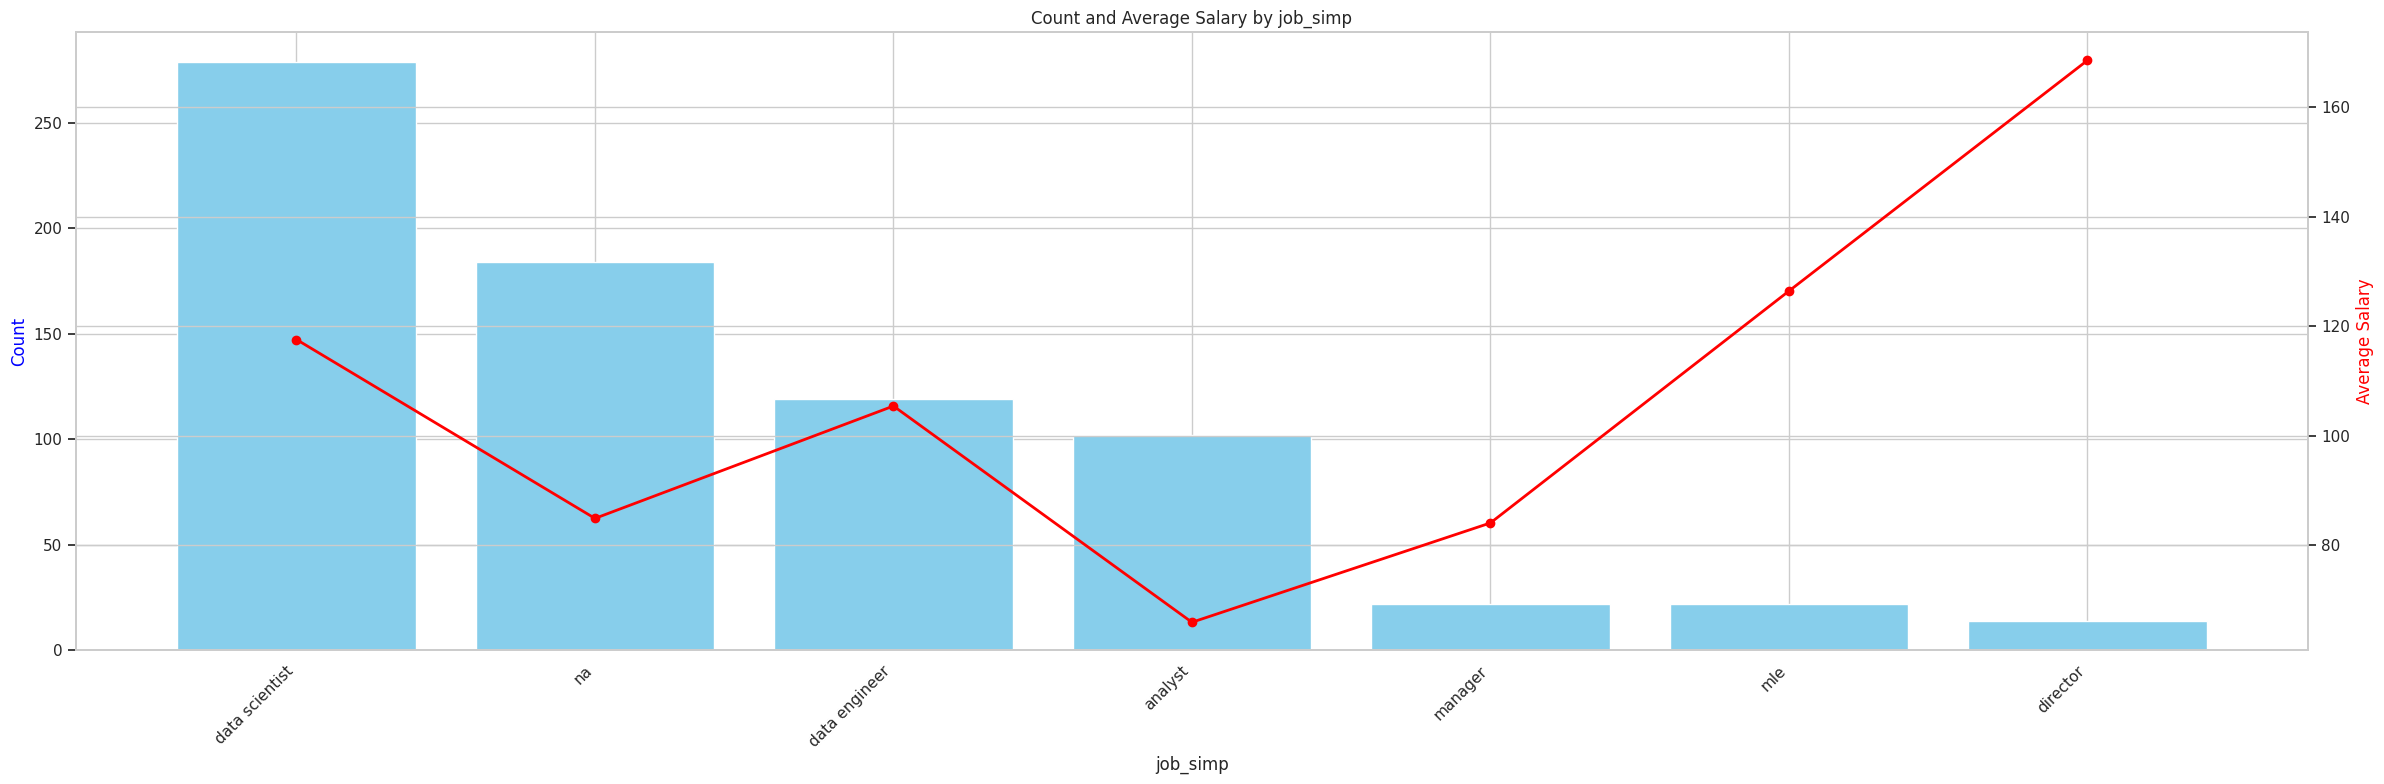

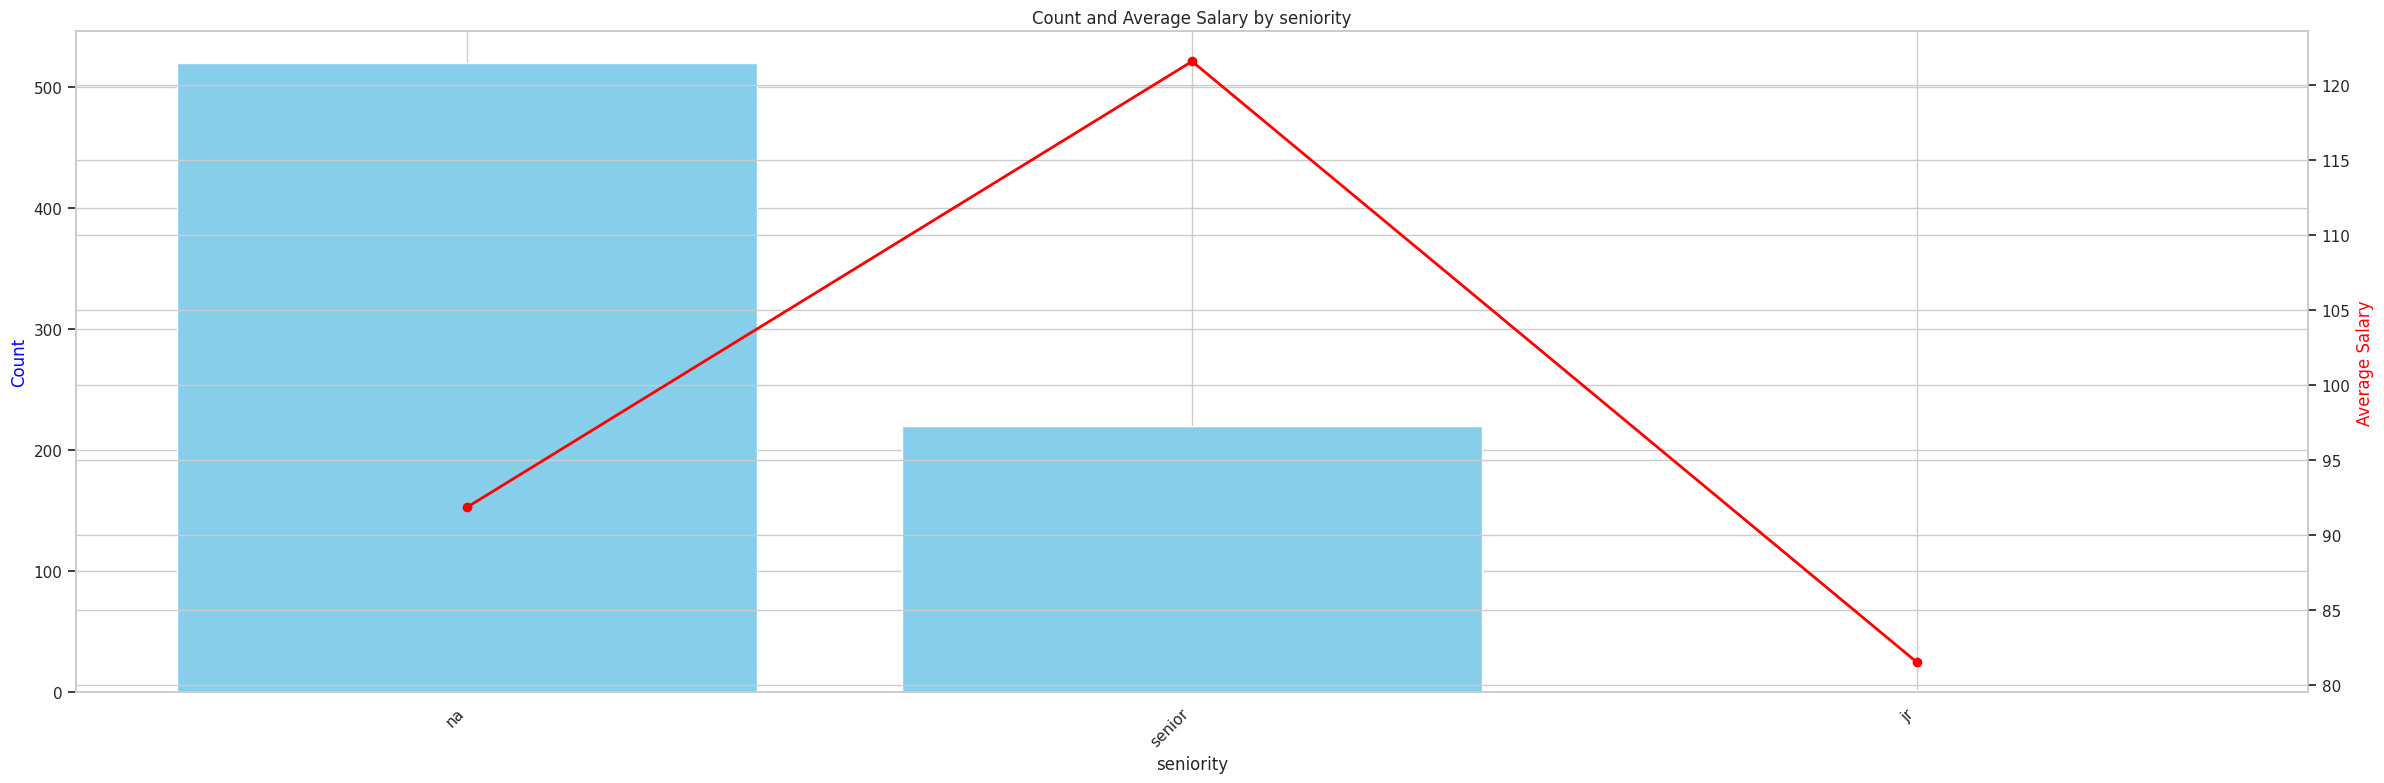

In [ ]:
job_cat_col = [col for col in job_col if (col in job_col)]

for feature in job_cat_col:
    count_data = df[feature].value_counts().head(15).rename('count')
    avg_salary = df.groupby(feature)['avg_salary'].mean().loc[count_data.index].rename('avg_salary')
    merged = pd.concat([count_data, avg_salary], axis=1).reset_index().rename(columns={'index': feature})

    fig, ax1 = plt.subplots(figsize=(24, 8))
    ax1.bar(merged[feature], merged['count'], color='skyblue')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(merged[feature], merged['avg_salary'], color='red', marker='o', linewidth=2)
    ax2.set_ylabel('Average Salary', color='red')

    plt.title(f"Count and Average Salary by {feature}")

    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

In [ ]:
pd.pivot_table(df, index='job_simp', values= 'avg_salary')

avg_salary
job_simp                  
analyst          65.857843
data engineer   105.403361
data scientist  117.564516
director        168.607143
manager          84.022727
mle             126.431818
na               84.853261

In [ ]:
pd.pivot_table(df, index=['job_simp','seniority'], values= 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
pd.pivot_table(df, index=['job_state','job_simp'], values= 'avg_salary', aggfunc='count').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [ ]:
df_pivots = df[
    ['Rating', 'Industry', 'Sector', 'Revenue', 'employer_provided','num_comp', 'hourly',
     'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'Type of ownership','avg_salary' ]]

In [ ]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        pivot_table = pd.pivot_table(df_pivots, index=i, values='avg_salary', aggfunc='mean')
        pivot_table_sorted = pivot_table.sort_values('avg_salary', ascending=False)
        print(pivot_table_sorted.head(2))  # Print only the top 2 rows

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                            163.5
Motion Picture Production & Distribution       146.0
Sector
        avg_salary
Sector            
Media   116.666667
-1      114.650000
Revenue
                         avg_salary
Revenue                            
$5 to $10 million (USD)  126.111111
$1 to $5 million (USD)   119.312500
employer_provided
                   avg_salary
employer_provided            
1                  119.970588
0                  100.172414
num_comp
          avg_salary
num_comp            
2         106.865854
1         106.208333
hourly
        avg_salary
hourly            
0         103.1539
1          25.0000
python_yn
           avg_salary
python_yn            
1          112.653061
0           87.155714
R_yn
      avg_salary
R_yn            
0     100.

## Insights

/tmp/ipython-input-1235643194.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')


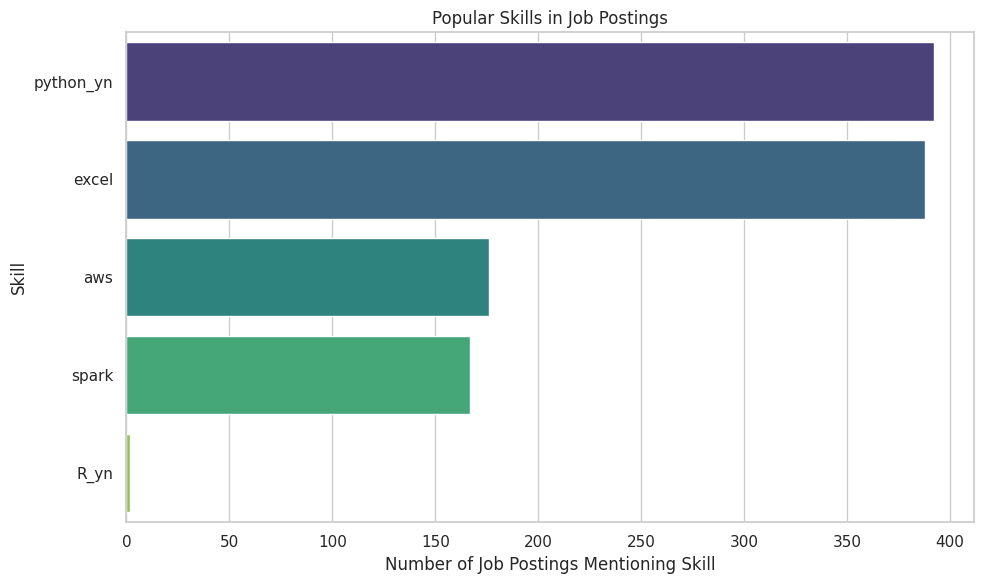

In [ ]:
# What skills are most popular?
skills = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']

skill_counts = {}
for skill in skills:
    vals = pd.to_numeric(df[skill], errors='coerce')
    count_yes = (vals == 1).sum()
    skill_counts[skill] = count_yes

skill_df = pd.DataFrame(list(skill_counts.items()), columns=['Skill', 'Count'])
skill_df = skill_df.sort_values('Count', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
plt.title('Popular Skills in Job Postings')
plt.xlabel('Number of Job Postings Mentioning Skill')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2469382739.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='skill_count', y='avg_salary', data=df_temp, palette='viridis')


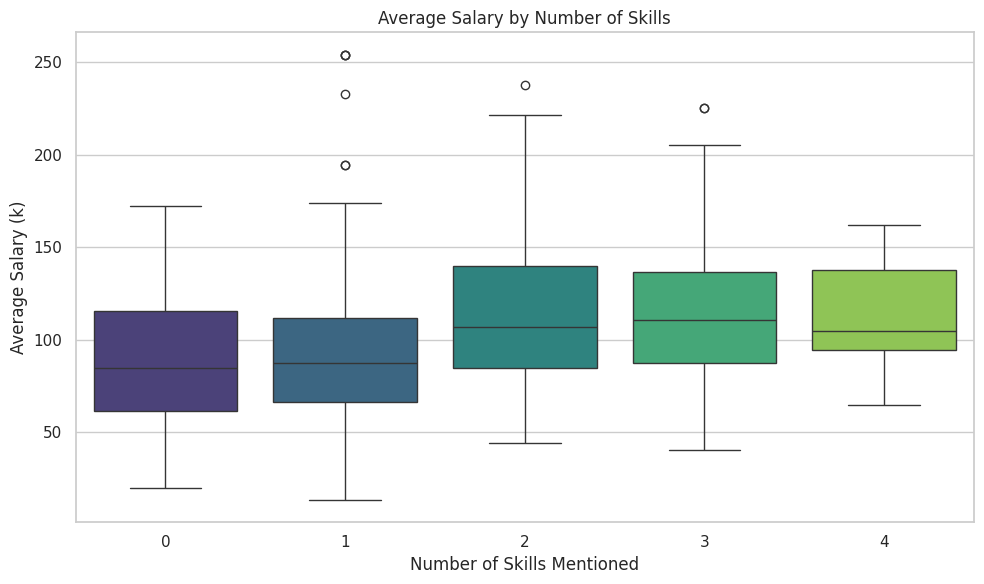

In [ ]:
# Having more skills tend to get the higher salaries?
df_temp = df.copy()
for col in skills:
    vals = pd.to_numeric(df_temp[col], errors='coerce')
    df_temp[col + '_flag'] = (vals >= 0.5).astype(int)

df_temp['skill_count'] = df_temp[[c+'_flag' for c in skills]].sum(axis=1)


plt.figure(figsize=(10,6))
sns.boxplot(x='skill_count', y='avg_salary', data=df_temp, palette='viridis')
plt.title('Average Salary by Number of Skills')
plt.xlabel('Number of Skills Mentioned')
plt.ylabel('Average Salary (k)')
plt.tight_layout()
plt.show()

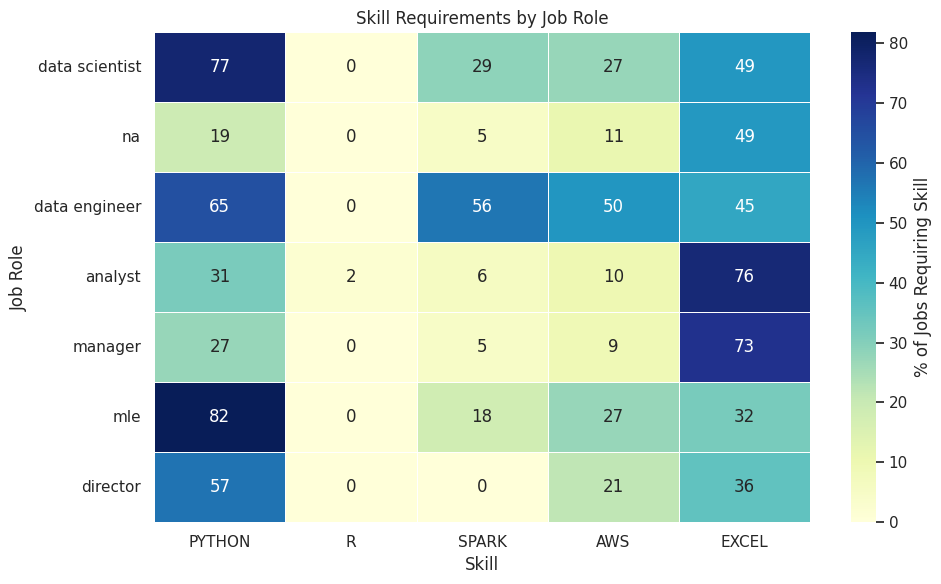

In [ ]:
df_temp = df.copy()
for col in skills:
    df_temp[col+'_flag'] = (pd.to_numeric(df_temp[col], errors='coerce') >= 0.5).astype(int)

job_skill_matrix = []
for job in df_temp['job_simp'].value_counts().head(7).index:  # top 7 job
    subset = df_temp[df_temp['job_simp']==job]
    row = {'Job': job}
    for skill in skills:
        pct = (subset[skill+'_flag'].sum() / len(subset)) * 100
        row[skill.replace('_yn','').upper()] = pct
    job_skill_matrix.append(row)

matrix_df = pd.DataFrame(job_skill_matrix).set_index('Job')

plt.figure(figsize=(10,6))
sns.heatmap(matrix_df, annot=True, fmt='.0f', cmap='YlGnBu',
            cbar_kws={'label':'% of Jobs Requiring Skill'}, linewidths=0.5)
plt.title('Skill Requirements by Job Role')
plt.xlabel('Skill')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3768041501.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='job_state', data=top5, palette='Greens_r', ax=ax1)
/tmp/ipython-input-3768041501.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='job_state', data=bottom5, palette='Reds_r', ax=ax2)


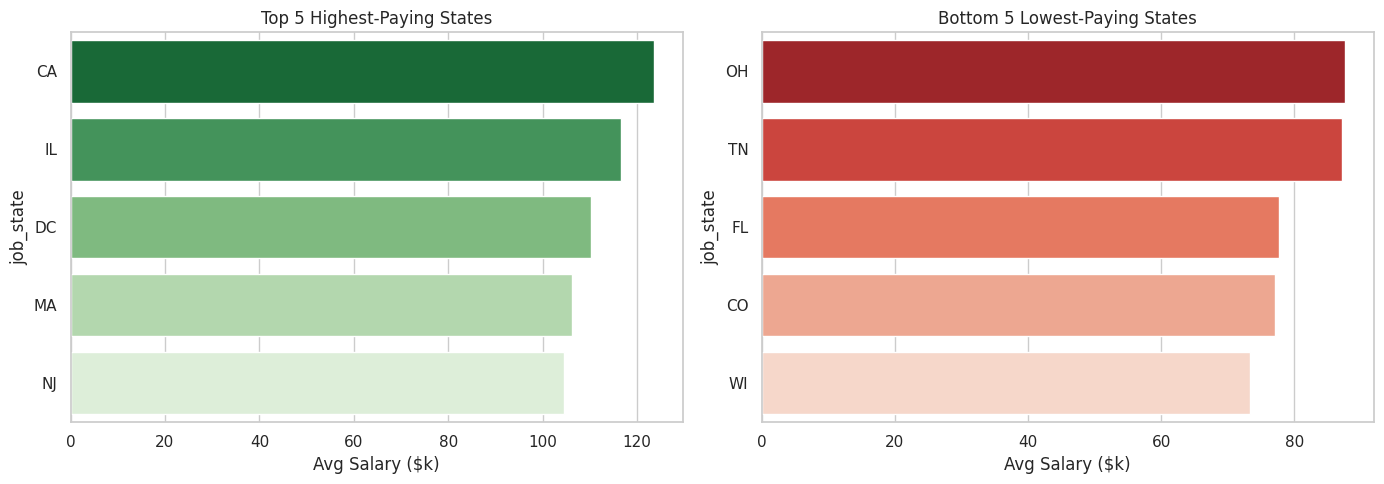

Geographic salary gap: $50.2k (69% difference)


In [ ]:
state_summary = df.groupby('job_state')['avg_salary'].agg(['mean','count']).reset_index()
state_summary = state_summary[state_summary['count'] >= 10]
state_summary = state_summary.sort_values('mean', ascending=False)

top5 = state_summary.head(5)
bottom5 = state_summary.tail(5)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
sns.barplot(x='mean', y='job_state', data=top5, palette='Greens_r', ax=ax1)
ax1.set_title('Top 5 Highest-Paying States')
ax1.set_xlabel('Avg Salary ($k)')

sns.barplot(x='mean', y='job_state', data=bottom5, palette='Reds_r', ax=ax2)
ax2.set_title('Bottom 5 Lowest-Paying States')
ax2.set_xlabel('Avg Salary ($k)')
plt.tight_layout()
plt.show()

gap = top5['mean'].iloc[0] - bottom5['mean'].iloc[-1]
print(f"Geographic salary gap: ${gap:.1f}k ({gap/bottom5['mean'].iloc[-1]*100:.0f}% difference)")

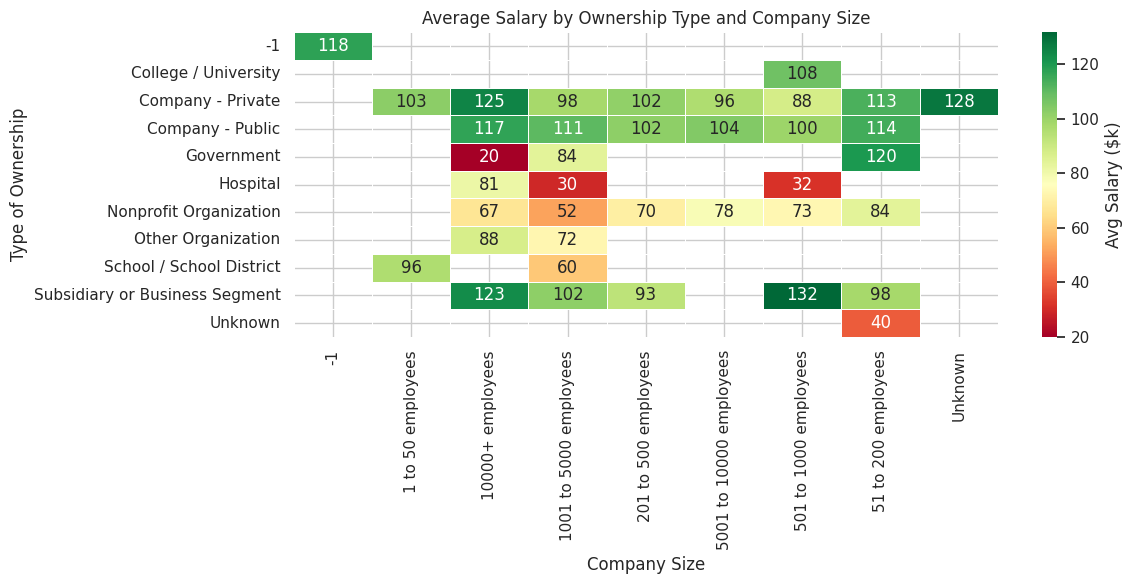

In [ ]:
"""
The highest average salaries ($113K - $128K) are found in Private Companies and Subsidiaries/Business Segments,
particularly those with 51 to 200 employees, and large Private Companies (10000+ employees).

Government jobs and Hospital jobs, especially in larger company sizes, show the lowest average salaries,
with some cells indicating averages as low as $20K - $30K.
"""
pivot = df.pivot_table(index='Type of ownership', columns='Size',
                       values='avg_salary', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn', linewidths=0.5, cbar_kws={'label':'Avg Salary ($k)'})
plt.title('Average Salary by Ownership Type and Company Size')
plt.xlabel('Company Size')
plt.ylabel('Type of Ownership')
plt.tight_layout()
plt.show()

In [ ]:
# --- Define WLB-related keywords ---
wlb_positive = [
    'flexible', 'remote', 'work from home', 'wfh', 'balance', 'hybrid',
    'autonomy', 'casual', 'relaxed', 'benefits', 'paid leave', 'vacation'
]

wlb_negative = [
    'fast-paced', 'fast paced', 'overtime', 'deadline', 'urgent', 'high-pressure',
    'demanding', 'startup', 'hustle', 'intense', 'long hours', 'pressure'
]

# --- Check for keyword presence in job descriptions ---
df['Job Description'] = df['Job Description'].fillna('').str.lower()
df['has_wlb_positive'] = df['Job Description'].str.contains('|'.join(wlb_positive)).astype(int)
df['has_wlb_negative'] = df['Job Description'].str.contains('|'.join(wlb_negative)).astype(int)

# --- Compute WLB score and category ---
df['wlb_score'] = df['has_wlb_positive'] - df['has_wlb_negative']

def categorize_wlb(score):
    if score > 0:
        return 'Good WLB Signals'
    elif score < 0:
        return 'Demanding Role Signals'
    else:
        return 'Neutral'

df['wlb_category'] = df['wlb_score'].apply(categorize_wlb)

# --- Summary table by WLB category ---
wlb_summary = (
    df.groupby('wlb_category')
      .agg(mean_salary=('avg_salary', 'mean'),
           median_salary=('avg_salary', 'median'),
           count=('avg_salary', 'count'))
      .reset_index()
)

print(wlb_summary)

             wlb_category  mean_salary  median_salary  count
0  Demanding Role Signals   102.381250          106.5     80
1        Good WLB Signals   101.570048           98.0    207
2                 Neutral    99.887912           96.0    455


/tmp/ipython-input-3643181628.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=wlb_industry.index, x=wlb_industry.mean_wlb, palette='RdYlGn')


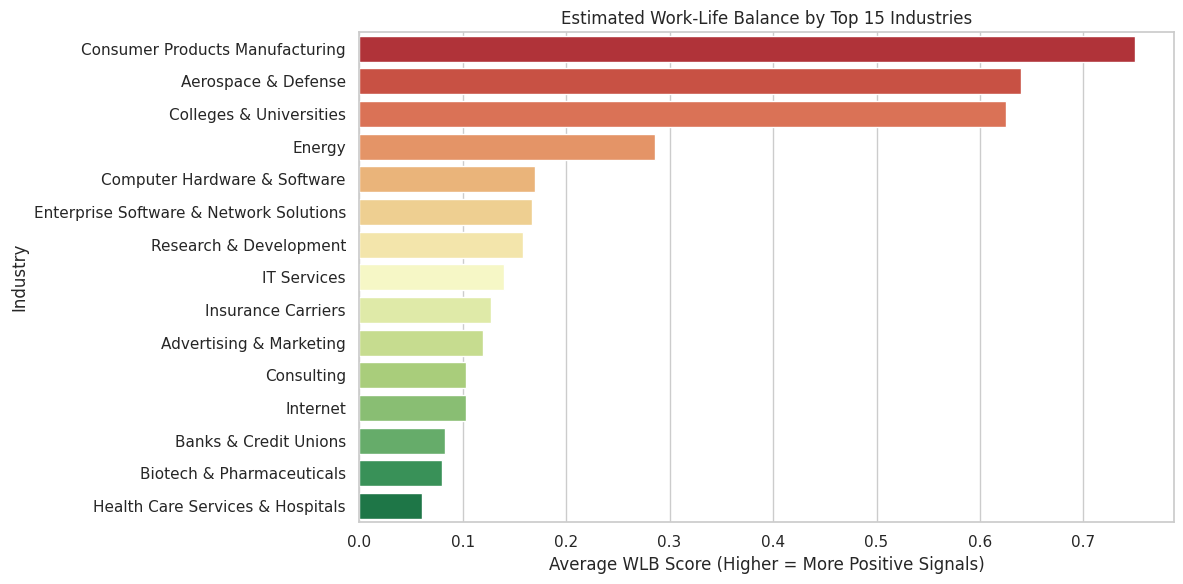

In [ ]:
# Get top 15 industries by number of job postings
top_industries = df['Industry'].value_counts().head(15).index

# Group, aggregate, and filter only top industries
wlb_industry = (
    df[df['Industry'].isin(top_industries)]  # filter top industries
      .groupby('Industry')
      .agg(mean_wlb=('wlb_score', 'mean'),
           avg_salary=('avg_salary', 'mean'),
           count=('Industry', 'count'))
      .sort_values('mean_wlb', ascending=False)
)

# Plot: Average WLB score for top industries
plt.figure(figsize=(12,6))
sns.barplot(y=wlb_industry.index, x=wlb_industry.mean_wlb, palette='RdYlGn')
plt.xlabel('Average WLB Score (Higher = More Positive Signals)')
plt.ylabel('Industry')
plt.title('Estimated Work-Life Balance by Top 15 Industries')
plt.tight_layout()
plt.show()


# cleaning data

In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'has_wlb_positive', 'has_wlb_negative', 'wlb_score',
       'wlb_category'],
      dtype='object')

In [ ]:
df.shape

(742, 37)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(10)

Unnamed: 0                  Job Title               Salary Estimate  \
0           0             Data Scientist    $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist   $63K-$112K (Glassdoor est.)   
2           2             Data Scientist    $80K-$90K (Glassdoor est.)   
3           3             Data Scientist    $56K-$97K (Glassdoor est.)   
4           4             Data Scientist   $86K-$143K (Glassdoor est.)   
5           5             Data Scientist   $71K-$119K (Glassdoor est.)   
6           6             Data Scientist    $54K-$93K (Glassdoor est.)   
7           7             Data Scientist   $86K-$142K (Glassdoor est.)   
8           8         Research Scientist    $38K-$84K (Glassdoor est.)   
9           9             Data Scientist  $120K-$160K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   
5  CyrusOne is seeking a talented Data Scientist ...     3.4   
6  Job Description\n\n**Please only local candida...     4.1   
7  Advanced Analytics – Lead Data Scientist\nOver...     3.8   
8  SUMMARY\n\nThe Research Scientist I will be ta...     3.3   
9  isn’t your usual company. Our work is powered ...     4.6   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   
5                               CyrusOne\n3.4       Dallas, TX   
6                     ClearOne Advantage\n4.1    Baltimore, MD   
7                             Logic20/20\n3.8     San Jose, CA   
8              Rochester Regional Health\n3.3    Rochester, NY   
9                               <intent>\n4.6     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   
5      Dallas, TX    201 to 500 employees     2000    Company - Public   
6   Baltimore, MD   501 to 1000 employees     2008   Company - Private   
7     Seattle, WA    201 to 500 employees     2005   Company - Private   
8   Rochester, NY        10000+ employees     2014            Hospital   
9    New York, NY     51 to 200 employees     2009   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   
5                       Real Estate                   Real Estate   
6             Banks & Credit Unions                       Finance   
7                        Consulting             Business Services   
8  Health Care Services & Hospitals                   Health Care   
9                          Internet        Information Technology   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 bil

In [ ]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Job Title', axis=1, inplace=True)
df.drop('Salary Estimate', axis=1, inplace=True)
df.drop('Company Name', axis=1, inplace=True)
df.drop('Competitors', axis=1, inplace=True)
df.head()

Job Description  Rating         Location  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  Albuquerque, NM   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4    Linthicum, MD   
2  KnowBe4, Inc. is a high growth information sec...     4.8   Clearwater, FL   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8     Richland, WA   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  hourly  employer_provided  min_salary  \
0         $50 to $100 million (USD)       0                  0          53   
1            $2 to $5 billion (USD)       0                  0          63   
2        $100 to $500 million (USD)       0                  0          80   
3  $500 million to $1 billion (USD)       0                  0          56   
4          Unknown / Non-Applicable       0                  0          86   

   max_salary  avg_salary                            company_txt job_state  \
0          91        72.0                      Tecolote Research        NM   
1         112        87.5  University of Maryland Medical System        MD   
2          90        85.0                                KnowBe4        FL   
3          97        76.5                                   PNNL        WA   
4         143       114.5                     Affinity Solutions        NY   

   same_state  age  python_yn  R_yn  spark  aws  excel        job_simp  \
0           0   47          1     0      0    0      1  data scientist   
1           0   36          1     0      0    0      0  data scientist   
2           1   10          1     0      1    0      1  data scientist   
3           1   55          1     0      0    0      0  data scientist   
4           1   22          1     0      0    0      1  data scientist   

  seniority  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
0        na      2536         0                 1                 0   
1        na      4783         0                 1                 1   
2        na      3461         0                 0                 1   
3        na      3883         3                 0                 0   
4        na      2728         3                 1                 0   

   wlb_score            wlb_category  
0          1        Good WLB Signals  
1          0                 Neutral  
2         -1  Demanding Role Signals  
3          0                 Neutral  
4          1        Good WLB Signals

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return ' '.join(words)

df['JD_keywords'] = df['Job Description'].apply(clean_text)

print(df[['Job Description', 'JD_keywords']].head())

                                     Job Description  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...   
1  What You Will Do:\n\nI. General Summary\n\nThe...   
2  KnowBe4, Inc. is a high growth information sec...   
3  *Organization and Job ID**\nJob ID: 310709\n\n...   
4  Data Scientist\nAffinity Solutions / Marketing...   

                                         JD_keywords  
0  data scientist location albuquerque education ...  
1  general summary healthcare data scientist posi...  
2  knowbe inc high growth information security co...  
3  organization job job directorate earth biologi...  
4  data scientist affinity solutions marketing cl...  


In [ ]:
all_words = ' '.join(df['JD_keywords']).split()

word_counts = Counter(all_words)

top = word_counts.most_common(50)

top_df = pd.DataFrame(top, columns=['Word', 'Frequency'])

print(top_df)

            Word  Frequency
0           data       7943
1     experience       3840
2           work       2158
3       business       1788
4           team       1677
5         skills       1538
6    development       1381
7        ability       1321
8        science       1298
9       learning       1144
10     analytics       1104
11      analysis       1065
12         years       1034
13     solutions       1004
14           new        987
15     technical        987
16       company        897
17       machine        885
18      research        867
19     knowledge        866
20     including        865
21       develop        847
22       support        831
23        strong        829
24       working        822
25    management        808
26         tools        757
27   information        751
28   engineering        744
29        design        740
30         using        728
31      required        697
32  requirements        692
33        models        690
34       related    

In [ ]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: count, dtype: int64

In [ ]:
def parse_revenue(rev_str):
    if not isinstance(rev_str, str):
        return np.nan, np.nan

    rev_str = rev_str.lower()

    if 'less than' in rev_str:
        factor = 1_000_000 if 'million' in rev_str else 1_000_000_000 if 'billion' in rev_str else 1
        return 0, int(1 * factor)

    plus_match = re.match(r'\$?(\d+\.?\d*)\+?\s*(million|billion)?', rev_str)
    if plus_match and '+' in rev_str:
        num = float(plus_match.group(1))
        multiplier = 1_000_000 if plus_match.group(2)=='million' else 1_000_000_000 if plus_match.group(2)=='billion' else 1
        return int(num*multiplier), np.nan

    numbers = re.findall(r'\$?(\d+\.?\d*)', rev_str)
    if len(numbers) >= 2:
        min_rev = float(numbers[0])
        max_rev = float(numbers[1])
    elif len(numbers) == 1:
        min_rev = max_rev = float(numbers[0])
    else:
        return np.nan, np.nan

    factor = 1_000_000 if 'million' in rev_str else 1_000_000_000 if 'billion' in rev_str else 1

    return int(min_rev * factor), int(max_rev * factor)

df[['min_revenue', 'max_revenue']] = df['Revenue'].apply(lambda x: pd.Series(parse_revenue(x)))

df.head()

Job Description  Rating         Location  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  Albuquerque, NM   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4    Linthicum, MD   
2  KnowBe4, Inc. is a high growth information sec...     4.8   Clearwater, FL   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8     Richland, WA   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  hourly  employer_provided  min_salary  \
0         $50 to $100 million (USD)       0                  0          53   
1            $2 to $5 billion (USD)       0                  0          63   
2        $100 to $500 million (USD)       0                  0          80   
3  $500 million to $1 billion (USD)       0                  0          56   
4          Unknown / Non-Applicable       0                  0          86   

   max_salary  avg_salary                            company_txt job_state  \
0          91        72.0                      Tecolote Research        NM   
1         112        87.5  University of Maryland Medical System        MD   
2          90        85.0                                KnowBe4        FL   
3          97        76.5                                   PNNL        WA   
4         143       114.5                     Affinity Solutions        NY   

   same_state  age  python_yn  R_yn  spark  aws  excel        job_simp  \
0           0   47          1     0      0    0      1  data scientist   
1           0   36          1     0      0    0      0  data scientist   
2           1   10          1     0      1    0      1  data scientist   
3           1   55          1     0      0    0      0  data scientist   
4           1   22          1     0      0    0      1  data scientist   

  seniority  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
0        na      2536         0                 1                 0   
1        na      4783         0                 1                 1   
2        na      3461         0                 0                 1   
3        na      3883         3                 0                 0   
4        na      2728         3                 1                 0   

   wlb_score            wlb_category  \
0          1        Good WLB Signals   
1          0                 Neutral   
2         -1  Demanding Role Signals   
3          0                 Neutral   
4          1        Good WLB Signals   

                                         JD_keywords   min_revenue  \
0  data scientist location albuquerque education ...  5.000000e+07   
1  general summary healthcare data scientist posi...  2.000000e+09   
2  knowbe inc high growth information security co...  1.000000e+08   
3  organization job job directorate earth biologi...  5.000000e+08   
4  data scientist affinity solutions marketing cl...           NaN   

    max_revenue  
0  1.000000e+08  
1  5.000000e+09  
2  5.000000e+08  
3  1.000000e+06  
4           NaN

In [ ]:
df['min_revenue'] = df.groupby('company_txt')['min_revenue'].transform(lambda x: x.fillna(x.mean()))
df['max_revenue'] = df.groupby('company_txt')['max_revenue'].transform(lambda x: x.fillna(x.mean()))

df.head()

Job Description  Rating         Location  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  Albuquerque, NM   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4    Linthicum, MD   
2  KnowBe4, Inc. is a high growth information sec...     4.8   Clearwater, FL   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8     Richland, WA   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  hourly  employer_provided  min_salary  \
0         $50 to $100 million (USD)       0                  0          53   
1            $2 to $5 billion (USD)       0                  0          63   
2        $100 to $500 million (USD)       0                  0          80   
3  $500 million to $1 billion (USD)       0                  0          56   
4          Unknown / Non-Applicable       0                  0          86   

   max_salary  avg_salary                            company_txt job_state  \
0          91        72.0                      Tecolote Research        NM   
1         112        87.5  University of Maryland Medical System        MD   
2          90        85.0                                KnowBe4        FL   
3          97        76.5                                   PNNL        WA   
4         143       114.5                     Affinity Solutions        NY   

   same_state  age  python_yn  R_yn  spark  aws  excel        job_simp  \
0           0   47          1     0      0    0      1  data scientist   
1           0   36          1     0      0    0      0  data scientist   
2           1   10          1     0      1    0      1  data scientist   
3           1   55          1     0      0    0      0  data scientist   
4           1   22          1     0      0    0      1  data scientist   

  seniority  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
0        na      2536         0                 1                 0   
1        na      4783         0                 1                 1   
2        na      3461         0                 0                 1   
3        na      3883         3                 0                 0   
4        na      2728         3                 1                 0   

   wlb_score            wlb_category  \
0          1        Good WLB Signals   
1          0                 Neutral   
2         -1  Demanding Role Signals   
3          0                 Neutral   
4          1        Good WLB Signals   

                                         JD_keywords   min_revenue  \
0  data scientist location albuquerque education ...  5.000000e+07   
1  general summary healthcare data scientist posi...  2.000000e+09   
2  knowbe inc high growth information security co...  1.000000e+08   
3  organization job job directorate earth biologi...  5.000000e+08   
4  data scientist affinity solutions marketing cl...           NaN   

    max_revenue  
0  1.000000e+08  
1  5.000000e+09  
2  5.000000e+08  
3  1.000000e+06  
4           NaN

In [ ]:
df['avg_revenue'] = df[['min_revenue', 'max_revenue']].mean(axis=1)

df.drop(['min_revenue', 'max_revenue'], axis=1, inplace=True)

df.avg_revenue.describe()

count    5.390000e+02
mean     3.072819e+09
std      4.091027e+09
min      1.000000e+00
25%      7.500000e+07
50%      3.000000e+08
75%      7.500000e+09
max      1.000000e+10
Name: avg_revenue, dtype: float64

In [ ]:
df.avg_revenue.isna().sum()

np.int64(203)

In [ ]:
cat_to_num = {
    "Unknown": 0,
    "-1": 0,
    "1 to 50 employees": 1,
    "51 to 200 employees": 2,
    "201 to 500 employees": 3,
    "501 to 1000 employees": 4,
    "1001 to 5000 employees": 5,
    "5001 to 10000 employees": 6,
    "10000+ employees": 7
}

df["Size_num"] = df["Size"].map(cat_to_num)

df.head()

Job Description  Rating         Location  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  Albuquerque, NM   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4    Linthicum, MD   
2  KnowBe4, Inc. is a high growth information sec...     4.8   Clearwater, FL   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8     Richland, WA   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  hourly  employer_provided  min_salary  \
0         $50 to $100 million (USD)       0                  0          53   
1            $2 to $5 billion (USD)       0                  0          63   
2        $100 to $500 million (USD)       0                  0          80   
3  $500 million to $1 billion (USD)       0                  0          56   
4          Unknown / Non-Applicable       0                  0          86   

   max_salary  avg_salary                            company_txt job_state  \
0          91        72.0                      Tecolote Research        NM   
1         112        87.5  University of Maryland Medical System        MD   
2          90        85.0                                KnowBe4        FL   
3          97        76.5                                   PNNL        WA   
4         143       114.5                     Affinity Solutions        NY   

   same_state  age  python_yn  R_yn  spark  aws  excel        job_simp  \
0           0   47          1     0      0    0      1  data scientist   
1           0   36          1     0      0    0      0  data scientist   
2           1   10          1     0      1    0      1  data scientist   
3           1   55          1     0      0    0      0  data scientist   
4           1   22          1     0      0    0      1  data scientist   

  seniority  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
0        na      2536         0                 1                 0   
1        na      4783         0                 1                 1   
2        na      3461         0                 0                 1   
3        na      3883         3                 0                 0   
4        na      2728         3                 1                 0   

   wlb_score            wlb_category  \
0          1        Good WLB Signals   
1          0                 Neutral   
2         -1  Demanding Role Signals   
3          0                 Neutral   
4          1        Good WLB Signals   

                                         JD_keywords   avg_revenue  Size_num  
0  data scientist location albuquerque education ...  7.500000e+07         4  
1  general summary healthcare data scientist posi...  3.500000e+09         7  
2  knowbe inc high growth information security co...  3.000000e+08         4  
3  organization job job directorate earth biologi...  2.505000e+08         5  
4  data scientist affinity solutions marketing cl...           NaN         2

In [ ]:
df.seniority.value_counts()

seniority
na        520
senior    220
jr          2
Name: count, dtype: int64

In [ ]:
avg_salaries = df[df['seniority'].isin(['jr', 'senior'])].groupby('seniority')['min_salary'].mean()
avg_jr = avg_salaries.get('jr', 0)
avg_senior = avg_salaries.get('senior', 0)

def infer_seniority(row):
    if row['seniority'] == 'na':
        # salary higher than avg_senior -> likely senior
        if row['min_salary'] > avg_senior:
            return 'senior'
        # salary lower than avg_jr -> likely junior
        elif row['min_salary'] < avg_jr:
            return 'jr'
        # otherwise in between -> mid-level or treat as 'na'
        else:
            return 'na'
    return row['seniority']

df['seniority_filled'] = df.apply(infer_seniority, axis=1)

df.head()

Job Description  Rating         Location  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  Albuquerque, NM   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4    Linthicum, MD   
2  KnowBe4, Inc. is a high growth information sec...     4.8   Clearwater, FL   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8     Richland, WA   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  hourly  employer_provided  min_salary  \
0         $50 to $100 million (USD)       0                  0          53   
1            $2 to $5 billion (USD)       0                  0          63   
2        $100 to $500 million (USD)       0                  0          80   
3  $500 million to $1 billion (USD)       0                  0          56   
4          Unknown / Non-Applicable       0                  0          86   

   max_salary  avg_salary                            company_txt job_state  \
0          91        72.0                      Tecolote Research        NM   
1         112        87.5  University of Maryland Medical System        MD   
2          90        85.0                                KnowBe4        FL   
3          97        76.5                                   PNNL        WA   
4         143       114.5                     Affinity Solutions        NY   

   same_state  age  python_yn  R_yn  spark  aws  excel        job_simp  \
0           0   47          1     0      0    0      1  data scientist   
1           0   36          1     0      0    0      0  data scientist   
2           1   10          1     0      1    0      1  data scientist   
3           1   55          1     0      0    0      0  data scientist   
4           1   22          1     0      0    0      1  data scientist   

  seniority  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
0        na      2536         0                 1                 0   
1        na      4783         0                 1                 1   
2        na      3461         0                 0                 1   
3        na      3883         3                 0                 0   
4        na      2728         3                 1                 0   

   wlb_score            wlb_category  \
0          1        Good WLB Signals   
1          0                 Neutral   
2         -1  Demanding Role Signals   
3          0                 Neutral   
4          1        Good WLB Signals   

                                         JD_keywords   avg_revenue  Size_num  \
0  data scientist location albuquerque education ...  7.500000e+07         4   
1  general summary healthcare data scientist posi...  3.500000e+09         7   
2  knowbe inc high growth information security co...  3.000000e+08         4   
3  organization job job directorate earth biologi...  2.505000e+08         5   
4  data scientist affinity solutions marketing cl...           NaN         2   

  seniority_filled  
0               jr  
1               na  
2               na  
3               jr  
4               na

In [ ]:
df.seniority_filled.value_counts()

seniority_filled
senior    305
na        226
jr        211
Name: count, dtype: int64

In [ ]:
df.drop('Job Description', axis=1, inplace=True)
df.drop('Size', axis=1, inplace=True)
df.drop('Founded', axis=1, inplace=True)
df.drop('Revenue', axis=1, inplace=True)
df.drop('seniority', axis=1, inplace=True)
df.drop('JD_keywords', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.drop('Headquarters', axis=1, inplace=True)
df.drop('Sector', axis=1, inplace=True)
df.drop('min_salary', axis=1, inplace=True)
df.drop('max_salary', axis=1, inplace=True)
df.drop('avg_revenue', axis=1, inplace=True)
df.head()

Rating   Type of ownership                          Industry  hourly  \
0     3.8   Company - Private               Aerospace & Defense       0   
1     3.4  Other Organization  Health Care Services & Hospitals       0   
2     4.8   Company - Private                 Security Services       0   
3     3.8          Government                            Energy       0   
4     2.9   Company - Private           Advertising & Marketing       0   

   employer_provided  avg_salary                            company_txt  \
0                  0        72.0                      Tecolote Research   
1                  0        87.5  University of Maryland Medical System   
2                  0        85.0                                KnowBe4   
3                  0        76.5                                   PNNL   
4                  0       114.5                     Affinity Solutions   

  job_state  same_state  age  python_yn  R_yn  spark  aws  excel  \
0        NM           0   47          1     0      0    0      1   
1        MD           0   36          1     0      0    0      0   
2        FL           1   10          1     0      1    0      1   
3        WA           1   55          1     0      0    0      0   
4        NY           1   22          1     0      0    0      1   

         job_simp  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
0  data scientist      2536         0                 1                 0   
1  data scientist      4783         0                 1                 1   
2  data scientist      3461         0                 0                 1   
3  data scientist      3883         3                 0                 0   
4  data scientist      2728         3                 1                 0   

   wlb_score            wlb_category  Size_num seniority_filled  
0          1        Good WLB Signals         4               jr  
1          0                 Neutral         7               na  
2         -1  Demanding Role Signals         4               na  
3          0                 Neutral         5               jr  
4          1        Good WLB Signals         2               na

In [ ]:
df.Rating.value_counts()

Rating
 3.9    63
 3.7    61
 3.8    61
 3.5    49
 4.0    47
 3.6    46
 3.4    44
 3.3    39
 3.2    35
 4.4    33
 4.3    32
 4.7    31
 4.2    26
 3.1    25
 4.1    19
 2.9    18
 3.0    17
 2.7    14
 2.6    12
-1.0    11
 4.6    10
 4.8     9
 4.5     7
 2.8     7
 2.4     7
 2.1     5
 5.0     5
 1.9     3
 2.3     2
 2.5     2
 2.2     2
Name: count, dtype: int64

In [ ]:
df.drop(df[df['Rating'] == -1.0].index, inplace=True)

In [ ]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 401
Company - Public                  193
Nonprofit Organization             54
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
Name: count, dtype: int64

In [ ]:
df.drop(df[df['Type of ownership'] == "Unknown"].index, inplace=True)

In [ ]:
df.Industry.value_counts()

Industry
Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
Health Care Services & Hospitals             49
IT Services                                  48
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Advertising & Marketing                      25
Aerospace & Defense                          25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
Travel Agencies                               8
Financial Analytics & Research                8
Real Estate                                   8
Food & Beverage Manufacturing                 8
Lending                                       8
Security Services                             7
Religious Organizations                       6
Insurance Agencies & Brokerages               6
Department, Clothing, & Shoe Stores           6
Investment Banking & Asset Management         5
Financial Transaction Processing              4
Gambling                                      4
Gas Stations                                  4
K-12 Education                                4
Logistics & Supply Chain                      4
Telecommunications Services                   4
Industrial Manufacturing                      4
Transportation Management                     3
Stock Exchanges                               3
Consumer Product Rental                       3
Social Assistance                             3
Construction                                  3
Wholesale                                     3
Education Training Services                   3
Video Games                                   3
Architectural & Engineering Services          3
Sporting Goods Stores                         2
TV Broadcast & Cable Networks                 2
Telecommunications Manufacturing              2
Brokerage Services                            2
Metals Brokers                                2
-1                                            1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Mining                                        1
Auctions & Galleries                          1
Trucking                                      1
Accounting                                    1
Health Care Products Manufacturing            1
Health, Beauty, & Fitness                     1
Beauty & Personal Accessories Stores          1
Name: count, dtype: int64

In [ ]:
df.drop(df[df['Industry'] == "-1"].index, inplace=True)

In [ ]:
df.age.value_counts()

age
-1      40
 10     32
 12     31
 24     27
 14     24
 8      21
 9      19
 36     18
 18     18
 62     18
 13     18
 5      16
 7      15
 239    14
 145    14
 169    14
 23     14
 6      13
 21     12
 55     12
 15     10
 108    10
 85     10
 17     10
 3      10
 39      9
 38      9
 20      9
 107     9
 59      9
 25      8
 43      8
 44      8
 31      8
 81      8
 52      8
 51      8
 171     7
 28      7
 32      7
 72      6
 16      6
 34      6
 11      6
 27      6
 150     6
 47      5
 168     5
 53      5
 4       5
 54      5
 56      4
 95      4
 105     4
 26      4
 190     4
 29      4
 48      3
 157     3
 22      3
 98      3
 77      3
 73      3
 50      3
 30      3
 19      3
 42      3
 135     3
 83      3
 68      2
 1       2
 46      2
 58      2
 66      2
 164     2
 37      2
 33      2
 174     2
 92      2
 40      2
 45      2
 69      2
 35      1
 93      1
 78      1
 160     1
 75      1
 49      1
 142     1
 276     1
 90      1
 103     1
 137     1
 133     1
 91      1
 170     1
 118     1
 208     1
 106     1
 121     1
 41      1
 131     1
Name: count, dtype: int64

In [ ]:
df.drop(df[df['age'] == -1].index, inplace=True)

In [ ]:
df.job_simp.value_counts()

job_simp
data scientist    261
na                166
data engineer     109
analyst            98
mle                22
manager            19
director           14
Name: count, dtype: int64

In [ ]:
df.head()

Rating   Type of ownership                          Industry  hourly  \
0     3.8   Company - Private               Aerospace & Defense       0   
1     3.4  Other Organization  Health Care Services & Hospitals       0   
2     4.8   Company - Private                 Security Services       0   
3     3.8          Government                            Energy       0   
4     2.9   Company - Private           Advertising & Marketing       0   

   employer_provided  avg_salary                            company_txt  \
0                  0        72.0                      Tecolote Research   
1                  0        87.5  University of Maryland Medical System   
2                  0        85.0                                KnowBe4   
3                  0        76.5                                   PNNL   
4                  0       114.5                     Affinity Solutions   

  job_state  same_state  age  python_yn  R_yn  spark  aws  excel  \
0        NM           0   47          1     0      0    0      1   
1        MD           0   36          1     0      0    0      0   
2        FL           1   10          1     0      1    0      1   
3        WA           1   55          1     0      0    0      0   
4        NY           1   22          1     0      0    0      1   

         job_simp  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
0  data scientist      2536         0                 1                 0   
1  data scientist      4783         0                 1                 1   
2  data scientist      3461         0                 0                 1   
3  data scientist      3883         3                 0                 0   
4  data scientist      2728         3                 1                 0   

   wlb_score            wlb_category  Size_num seniority_filled  
0          1        Good WLB Signals         4               jr  
1          0                 Neutral         7               na  
2         -1  Demanding Role Signals         4               na  
3          0                 Neutral         5               jr  
4          1        Good WLB Signals         2               na

# encoding data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def prepare_data_for_tree(X):
    X_tree = X.copy()
    le = LabelEncoder()
    for col in categorical_cols:
        X_tree[col] = le.fit_transform(X_tree[col])
    return X_tree

def prepare_data_for_linear(X):
    X_linear = pd.get_dummies(X, drop_first=True)
    return X_linear

# train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('avg_salary', axis=1)
y = df['avg_salary']

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

# build the model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import time
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
RANDOM_STATE = 42

tree_models = {
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Random Forest": RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingRegressor(random_state=RANDOM_STATE),
}

linear_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=RANDOM_STATE),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=10000, random_state=RANDOM_STATE),
    "Linear SVR": SVR(kernel="linear", C=1.0),
    "K Nearest Neighbors": KNeighborsRegressor(n_neighbors=5, weights="uniform"),
    "Neural Net": MLPRegressor(hidden_layer_sizes=(100,), activation="relu",
                               solver="adam", alpha=1e-4, max_iter=300,
                               random_state=RANDOM_STATE)
}

In [ ]:
def batch_regress(models, X_train, y_train, model_type="unknown", verbose=True):
    y_train = np.ravel(y_train)
    no_regressors = len(models)

    df_results = pd.DataFrame({
        "regressor": pd.Series([None]*no_regressors, dtype="object"),
        "train_score": np.zeros(no_regressors, dtype=float),
        "training_time": np.zeros(no_regressors, dtype=float),
        "type": [model_type] * no_regressors
    })

    for count, (name, reg) in enumerate(models.items()):
        t0 = time.perf_counter()
        try:
            reg.fit(X_train, y_train)
            t = time.perf_counter() - t0
            score = reg.score(X_train, y_train)  # R^2 score
        except Exception as e:
            t = time.perf_counter() - t0
            score = np.nan
            if verbose:
                print(f"[WARN] {name} failed with: {e}")

        df_results.loc[count, "regressor"] = name
        df_results.loc[count, "train_score"] = score
        df_results.loc[count, "training_time"] = t

        if verbose:
            print(f"trained {name} ({model_type}) in {t:.2f} s")

    return df_results

In [ ]:
X_train_tree = prepare_data_for_tree(X_train)
X_train_linear = prepare_data_for_linear(X_train)

In [ ]:
X_train_tree.head()

Rating  Type of ownership  Industry  hourly  employer_provided  \
542     3.3                  1        10       1                  1   
224     3.4                  1        17       0                  0   
14      3.7                  2         6       0                  0   
260     3.6                  8        14       0                  0   
513     3.9                  2         6       0                  0   

     company_txt  job_state  same_state  age  python_yn  R_yn  spark  aws  \
542          147         16           1   44          0     0      0    0   
224          259          2           1    7          1     0      0    0   
14           238         16           0  239          1     0      1    0   
260          271          2           1   14          0     0      0    0   
513          100         16           0  190          0     0      0    1   

     excel  job_simp  desc_len  num_comp  has_wlb_positive  has_wlb_negative  \
542      1         6      1848         0                 1                 0   
224      1         0      5483         0                 1                 1   
14       0         2      3731         3                 0                 0   
260      1         0      4353         0                 1                 0   
513      0         6      5838         3                 1                 0   

     wlb_score  wlb_category  Size_num  seniority_filled  
542          1             1         1                 0  
224          0             2         2                 0  
14           0             2         7                 1  
260          1             1         2                 0  
513          1             1         7                 1

In [ ]:
X_train_linear.head()

Rating  hourly  employer_provided  same_state  age  python_yn  R_yn  \
542     3.3       1                  1           1   44          0     0   
224     3.4       0                  0           1    7          1     0   
14      3.7       0                  0           0  239          1     0   
260     3.6       0                  0           1   14          0     0   
513     3.9       0                  0           0  190          0     0   

     spark  aws  excel  desc_len  num_comp  has_wlb_positive  \
542      0    0      1      1848         0                 1   
224      0    0      1      5483         0                 1   
14       1    0      0      3731         3                 0   
260      0    0      1      4353         0                 1   
513      0    1      0      5838         3                 1   

     has_wlb_negative  wlb_score  Size_num  \
542                 0          1         1   
224                 1          0         2   
14                  0          0         7   
260                 0          1         2   
513                 0          1         7   

     Type of ownership_Company - Private  Type of ownership_Company - Public  \
542                                 True                               False   
224                                 True                               False   
14                                 False                                True   
260                                False                               False   
513                                False                                True   

     Type of ownership_Government  Type of ownership_Hospital  \
542                         False                       False   
224                         False                       False   
14                          False                       False   
260                         False                       False   
513                         False                       False   

     Type of ownership_Nonprofit Organization  \
542                                     False   
224                                     False   
14                                      False   
260                                     False   
513                                     False   

     Type of ownership_Other Organization  \
542                                 False   
224                                 False   
14                                  False   
260                                 False   
513                                 False   

     Type of ownership_School / School District  \
542                                       False   
224                                       False   
14                                        False   
260                                       False   
513                                       False   

     Type of ownership_Subsidiary or Business Segment  \
542                                             False   
224                                             False   
14                                              False   
260                                              True   
513                                             False   

     Industry_Aerospace & Defense  \
542                         False   
224                         False   
14                          False   
260                         False   
513                         False   

     Industry_Architectural & Engineering Services  \
542                                          False   
224                                          False   
14                                           False   
260                                          False   
513                                          False   

     Industry_Auctions & Galleries  Industry_Banks & Credit Unions  \
542                          False                           False   
224                          False                           False   
14                           False      

In [ ]:
df_results_tree = batch_regress(tree_models, X_train_tree, y_train, model_type="Tree-Based")

df_results_linear = batch_regress(linear_models, X_train_linear, y_train, model_type="Linear-Based")

df_results = pd.concat([df_results_tree, df_results_linear])
df_results = df_results.sort_values(by="train_score", ascending=False).reset_index(drop=True)

trained Decision Tree (Tree-Based) in 0.01 s
trained Random Forest (Tree-Based) in 0.84 s
trained Gradient Boosting (Tree-Based) in 0.20 s
trained Linear Regression (Linear-Based) in 0.06 s
trained Ridge Regression (Linear-Based) in 0.03 s
trained Lasso Regression (Linear-Based) in 0.25 s
trained Linear SVR (Linear-Based) in 243.48 s
trained K Nearest Neighbors (Linear-Based) in 0.01 s
trained Neural Net (Linear-Based) in 3.58 s


In [ ]:
print("\n=== Model Training Results ===")
print(df_results)


=== Model Training Results ===
             regressor  train_score  training_time          type
0        Decision Tree     1.000000       0.011984    Tree-Based
1        Random Forest     0.977063       0.840254    Tree-Based
2    Linear Regression     0.958056       0.056530  Linear-Based
3     Lasso Regression     0.939922       0.251892  Linear-Based
4    Gradient Boosting     0.913530       0.196879    Tree-Based
5     Ridge Regression     0.911214       0.032356  Linear-Based
6           Linear SVR     0.616723     243.479162  Linear-Based
7           Neural Net     0.477106       3.578946  Linear-Based
8  K Nearest Neighbors     0.412729       0.005746  Linear-Based


# cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
top3_regressors = df_results.sort_values(by="train_score", ascending=False).head(3)
print("Top 3 Regressors (based on training score):")
print(top3_regressors)

Top 3 Regressors (based on training score):
           regressor  train_score  training_time          type
0      Decision Tree     1.000000       0.011984    Tree-Based
1      Random Forest     0.977063       0.840254    Tree-Based
2  Linear Regression     0.958056       0.056530  Linear-Based


In [ ]:
cv_results = []

for name in top3_regressors['regressor']:
    if name in tree_models:
        reg = tree_models[name]
        X_train_used = X_train_tree
    elif name in linear_models:
        reg = linear_models[name]
        X_train_used = X_train_linear
    else:
        print(f"[WARN] Model {name} not found in defined dicts — skipped.")
        continue

    scores = cross_val_score(reg, X_train_used, y_train, cv=3, scoring='r2')
    mean_score = scores.mean()
    cv_results.append((name, mean_score))

cv_df = pd.DataFrame(cv_results, columns=["Regressor", "CV Mean R2"])
cv_df = cv_df.sort_values(by="CV Mean R2", ascending=False).reset_index(drop=True)
print("\nCross-Validation Results:")
print(cv_df)


Cross-Validation Results:
           Regressor  CV Mean R2
0      Random Forest    0.793088
1      Decision Tree    0.673006
2  Linear Regression    0.263210


In [ ]:
top_models_preds = {}

for name in cv_df['Regressor']:
    if name in tree_models:
        reg = tree_models[name]
        X_train_used = X_train_tree
    elif name in linear_models:
        reg = linear_models[name]
        X_train_used = X_train_linear
    else:
        continue

    y_pred = cross_val_predict(reg, X_train_used, y_train, cv=3)

    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)

    print(f"{name} -> R²: {r2:.3f}, RMSE: {rmse:.2f}")

    top_models_preds[name] = y_pred

Random Forest -> R²: 0.794, RMSE: 17.84
Decision Tree -> R²: 0.680, RMSE: 22.21
Linear Regression -> R²: 0.290, RMSE: 33.07


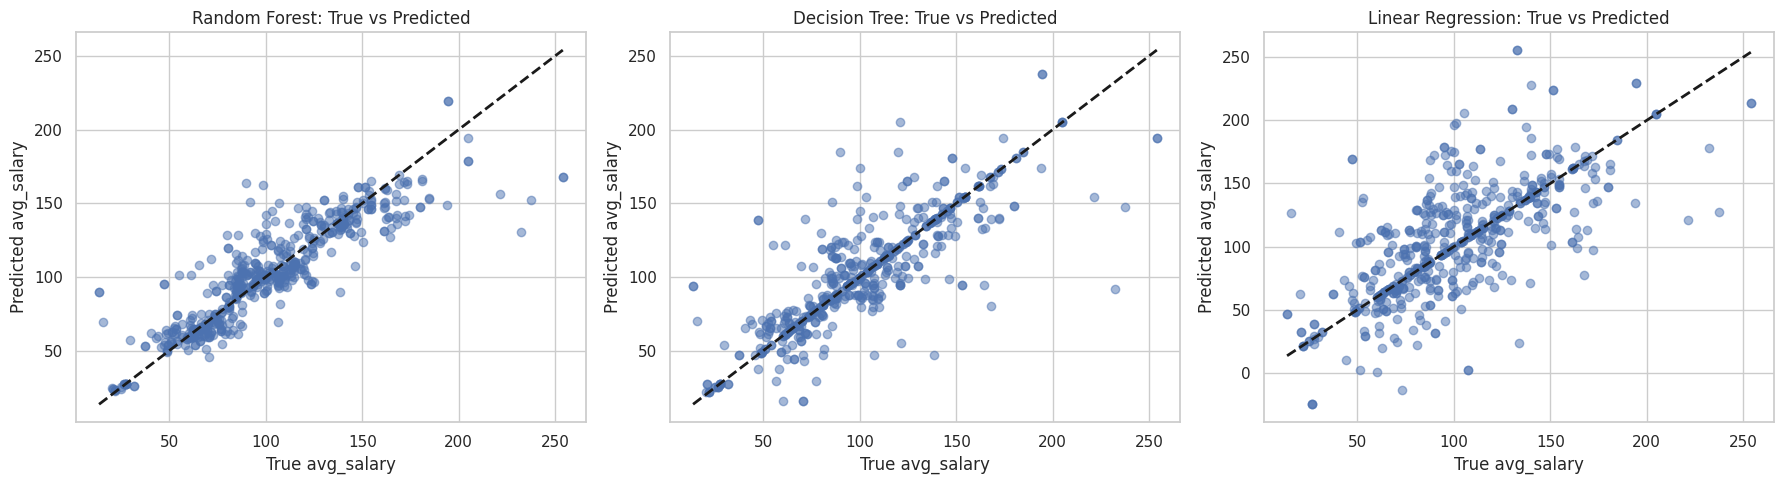

In [ ]:
plt.figure(figsize=(18, 5))

for i, (name, y_pred) in enumerate(top_models_preds.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_train, y_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
    plt.xlabel("True avg_salary")
    plt.ylabel("Predicted avg_salary")
    plt.title(f"{name}: True vs Predicted")

plt.tight_layout()
plt.show()

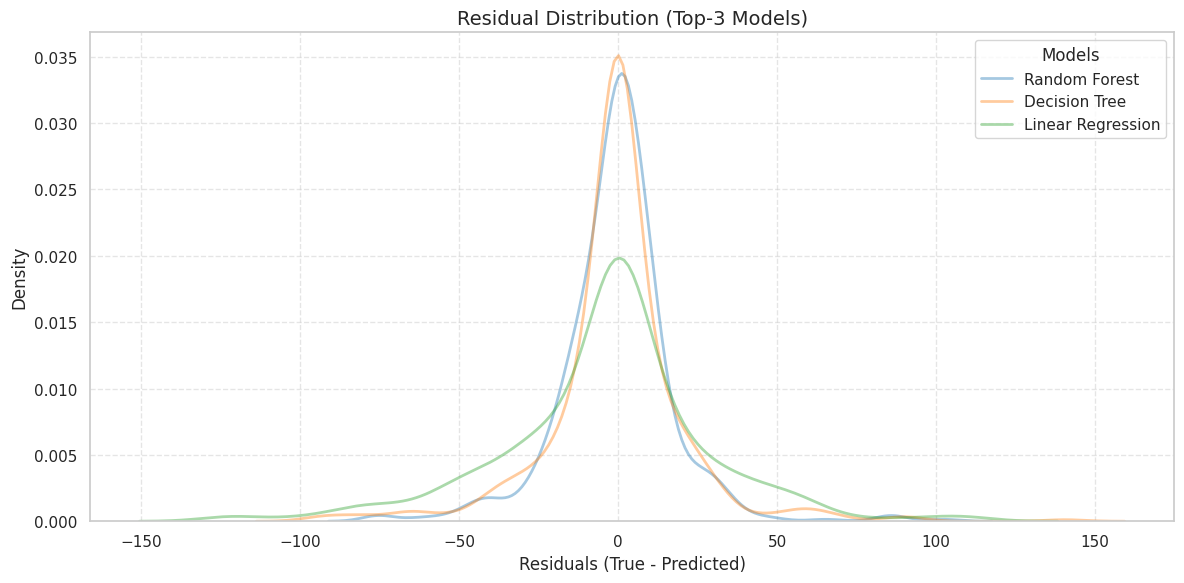

In [ ]:
plt.figure(figsize=(12, 6))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # blue, orange, green

for (name, y_pred), color in zip(top_models_preds.items(), colors):
    residuals = y_train - y_pred
    sns.kdeplot(residuals, label=name, color=color, alpha=0.4, linewidth=2)

plt.title("Residual Distribution (Top-3 Models)", fontsize=14)
plt.xlabel("Residuals (True - Predicted)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Models")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# importance feature extraction


Best model based on CV R²: Random Forest

Retrained best model: Random Forest

Feature ranking:
 1.     seniority_filled (0.541829)
 2.             job_simp (0.110709)
 3.            job_state (0.073543)
 4.          company_txt (0.037790)
 5.               Rating (0.037109)
 6.             desc_len (0.036898)
 7.               hourly (0.035420)
 8.                  age (0.025505)
 9.             Industry (0.024582)
10.    Type of ownership (0.012991)
11.             num_comp (0.010621)
12.             Size_num (0.009950)
13.            python_yn (0.007907)
14.            wlb_score (0.007098)
15.                excel (0.005597)
16.         wlb_category (0.004346)
17.     has_wlb_negative (0.004285)
18.                  aws (0.004044)
19.           same_state (0.003817)
20.                spark (0.002943)
21.     has_wlb_positive (0.002925)
22.                 R_yn (0.000077)
23.    employer_provided (0.000012)


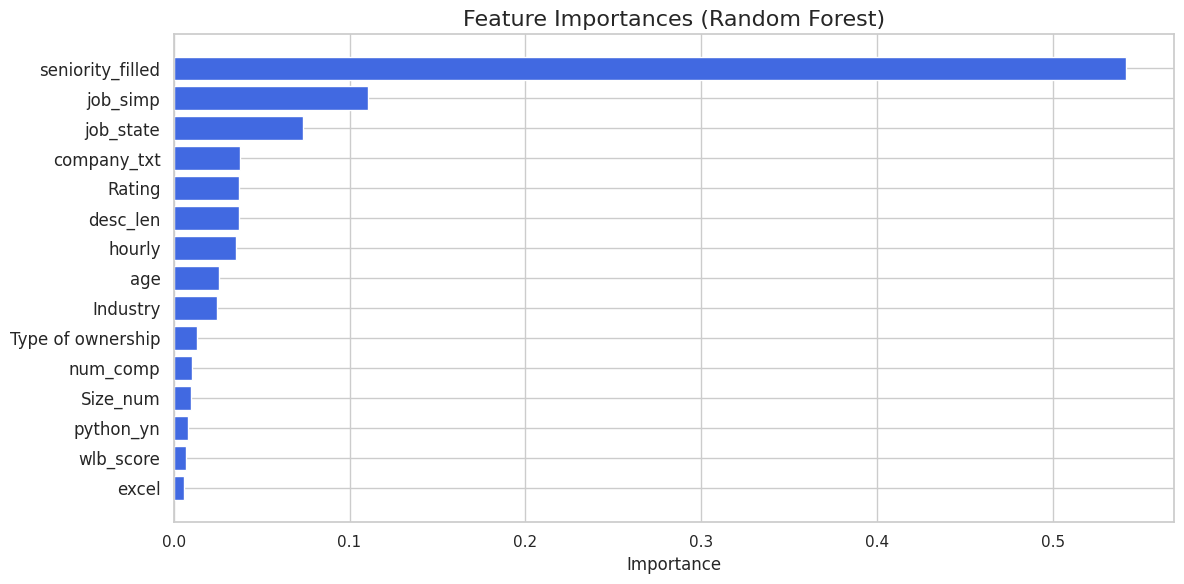

In [ ]:
best_model_name = cv_df.iloc[0]["Regressor"]
print(f"\nBest model based on CV R²: {best_model_name}")

if best_model_name in tree_models:
    best_model = tree_models[best_model_name]
    X_train_used = X_train_tree
elif best_model_name in linear_models:
    best_model = linear_models[best_model_name]
    X_train_used = X_train_linear
else:
    raise ValueError(f"Model '{best_model_name}' not found in either tree or linear dictionaries.")

best_model.fit(X_train_used, y_train)
print(f"\nRetrained best model: {best_model_name}")

if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_names = np.asarray(X_train.columns)
    indices = np.argsort(importances)[::-1]

    print("\nFeature ranking:")
    for rank, (fname, imp) in enumerate(zip(feature_names[indices], importances[indices]), start=1):
        print(f"{rank:2d}. {fname:>20s} ({imp:.6f})")

    def plot_feature_importance(indices, importances, feature_names, top_k=None):
        if top_k is not None:
            indices = indices[:top_k]
        sorted_imps = importances[indices]
        sorted_names = feature_names[indices]

        plt.figure(figsize=(12, 6))
        plt.title(f"Feature Importances ({best_model_name})", fontsize=16)
        plt.barh(range(len(indices)), sorted_imps, align="center", color="royalblue")
        plt.yticks(range(len(indices)), sorted_names, fontsize=12)
        plt.gca().invert_yaxis()
        plt.xlabel("Importance", fontsize=12)
        plt.tight_layout()
        plt.show()

    plot_feature_importance(indices, importances, feature_names, top_k=15)

else:
    print(f"\nThe best model '{best_model_name}' does not support feature importance extraction.")

# find best param

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.7 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from optuna.visualization.matplotlib import (
    plot_param_importances,
    plot_optimization_history,
    plot_parallel_coordinate,
    plot_contour,
    plot_slice,
    plot_edf,
    plot_rank,
)

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    params = {
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "max_features": max_features,
        "bootstrap": bootstrap,
        "random_state": 42,
        "n_jobs": -1,
    }

    model = RandomForestRegressor(**params)
    score = cross_val_score(model, X_train_tree, y_train, cv=5, scoring="r2", n_jobs=-1).mean()
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("\nBest Parameters:", study.best_params)
print("Best CV R² Score:", study.best_value)

[I 2025-10-17 10:07:35,193] A new study created in memory with name: no-name-6012f38a-2947-416e-981d-51a1c043e1e3


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-17 10:07:41,659] Trial 0 finished with value: 0.6954308299385182 and parameters: {'n_estimators': 279, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6954308299385182.
[I 2025-10-17 10:07:43,337] Trial 1 finished with value: 0.7074970310406584 and parameters: {'n_estimators': 109, 'max_depth': 29, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7074970310406584.
[I 2025-10-17 10:07:44,634] Trial 2 finished with value: 0.6888244861348559 and parameters: {'n_estimators': 63, 'max_depth': 49, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7074970310406584.
[I 2025-10-17 10:07:49,103] Trial 3 finished with value: 0.8034811202062266 and parameters: {'n_estimators': 242, 'max_depth': 39, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_feat

In [ ]:
best_rf = RandomForestRegressor(**study.best_params, random_state=42)
best_rf.fit(X_train_tree, y_train)

RandomForestRegressor(max_depth=45, max_features=None, n_estimators=93,
                      random_state=42)

In [ ]:
X_test = prepare_data_for_tree(X_test)
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nTest R²: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")


Test R²: 0.8491
Test RMSE: 14.4823


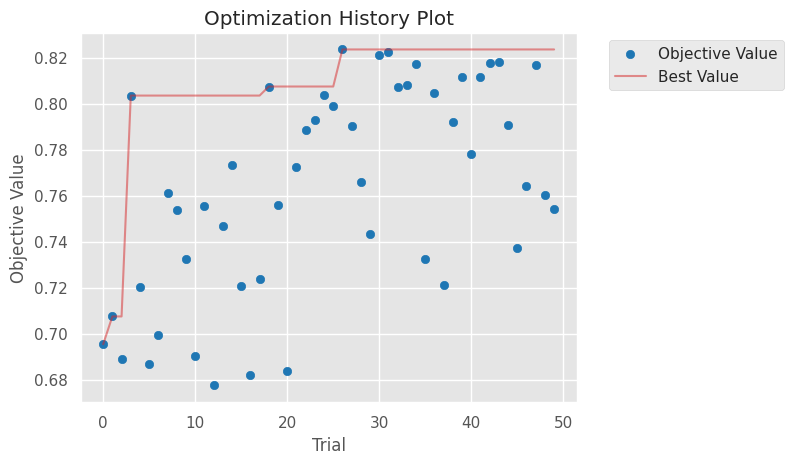

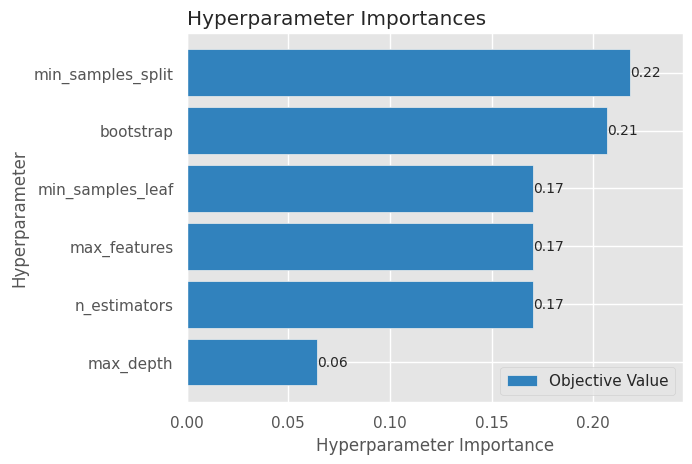

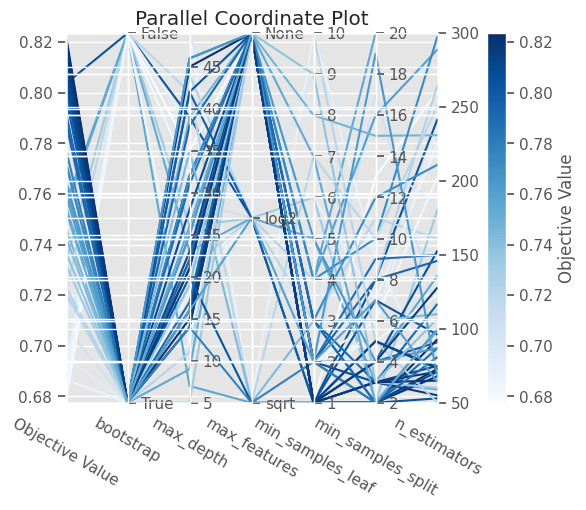

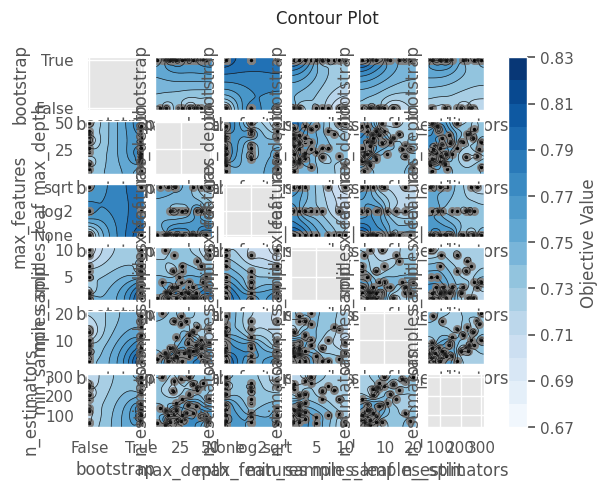

In [ ]:
plot_optimization_history(study)
plt.show()

plot_param_importances(study)
plt.show()

plot_parallel_coordinate(study)
plt.show()

plot_contour(study)
plt.show()

In [ ]:
importances = best_rf.feature_importances_
feature_names = np.asarray(X_train_tree.columns)
indices = np.argsort(importances)[::-1]

feature_importance_df = pd.DataFrame({
    "Feature": feature_names[indices],
    "Importance": importances[indices]
}).reset_index(drop=True)

print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))


Top 10 Important Features:
             Feature  Importance
0   seniority_filled    0.536855
1           job_simp    0.116001
2          job_state    0.074972
3        company_txt    0.036510
4           desc_len    0.035544
5             Rating    0.035153
6             hourly    0.034929
7                age    0.026728
8           Industry    0.024570
9  Type of ownership    0.015020


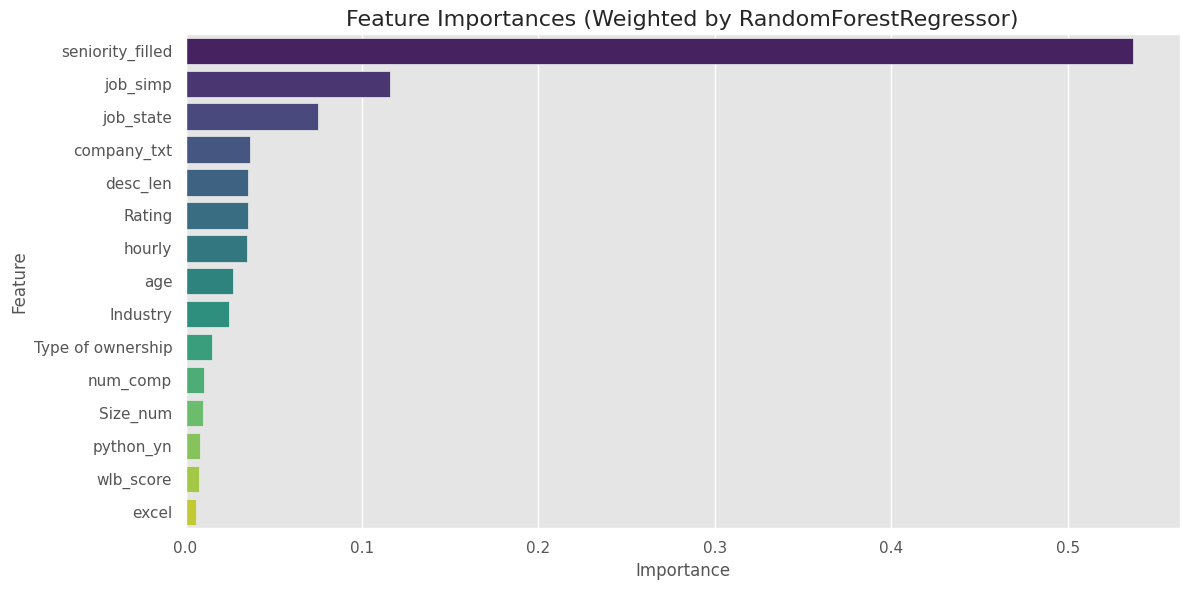

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Importance", y="Feature",
    data=feature_importance_df.head(15),
    palette="viridis"
)
plt.title("Feature Importances (Weighted by RandomForestRegressor)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# re train

In [ ]:
top_features = feature_importance_df["Feature"].head(10).tolist()

X_train_top = X_train_tree[top_features]
X_test_top = X_test[top_features]

In [ ]:
final_rf = RandomForestRegressor(**study.best_params, random_state=42)
final_rf.fit(X_train_top, y_train)

y_pred_top = final_rf.predict(X_test_top)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_top)
mae = mean_absolute_error(y_test, y_pred_top)
mse = mean_squared_error(y_test, y_pred_top)
rmse = np.sqrt(mse)

print(f"Model retrained with top features:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Model retrained with top features:
R²: 0.8387
MAE: 10.8747
RMSE: 14.9744
